<a href="https://colab.research.google.com/github/dhrisandamedhi/Retail_store/blob/main/EDA_retail_store.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  Retail_store



##### **Project Type**    - EDA/Regression
##### **Contribution**    - Individual
#####**Name**-Dhrisanda Medhi


# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

Provide your GitHub Link here.

# **Problem Statement**

Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied. You are provided with historical sales data for 1,115 Rossmann stores. The task is to forecast the "Sales" column for the test set. Note that some stores in the dataset were temporarily closed for refurbishment. Data Description Rossmann Stores Data.csv - historical data including Sales store.csv - supplemental information about the stores Data fields Most of the fields are self-explanatory. Id - an Id that represents a (Store, Da,,te) duple within the set Store - a unique Id for each store Sales - the turnover for any given day (Dependent Variable) Customers - the number of customers on a given day


**Write Problem Statement Here.**

#### **Define Your Business Objective?**

Answer Here.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 20 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
# importing all libraries required in the dataset 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
import datetime as dt
import missingno as msno
import math
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LassoLars
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import ElasticNet


In [79]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Dataset Loading

In [83]:
# Load Dataset
store_test= pd.read_csv('/content/drive/MyDrive/Retail_sales_prediction/store.csv')
store_train = pd.read_csv('/content/drive/MyDrive/Retail_sales_prediction/Rossmann Stores Data.csv')

<ipython-input-83-475fb60ce062>:3: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  store_train = pd.read_csv('/content/drive/MyDrive/Retail_sales_prediction/Rossmann Stores Data.csv')


#***Analyze Rossmann Store dataset***

### Dataset First View

In [4]:
# Dataset First Look
store_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


->First 5 Rows of the dataset.

In [5]:
#tail of the dataset
store_train.tail()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1
1017208,1115,2,2013-01-01,0,0,0,0,a,1


->Last five rows of the dataset.

### Dataset Rows & Columns count

In [6]:
# Dataset Rows & Columns count
store_train.shape

(1017209, 9)

### Dataset Information

In [7]:
# Dataset Info
store_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


#### Duplicate Values

In [8]:
# Dataset Duplicate Value Count
store_train.duplicated().sum()


0

#### Missing Values/Null Values

In [9]:
# Missing Values/Null Values Count
store_train.isna().sum()

Store            0
DayOfWeek        0
Date             0
Sales            0
Customers        0
Open             0
Promo            0
StateHoliday     0
SchoolHoliday    0
dtype: int64

<Axes: >

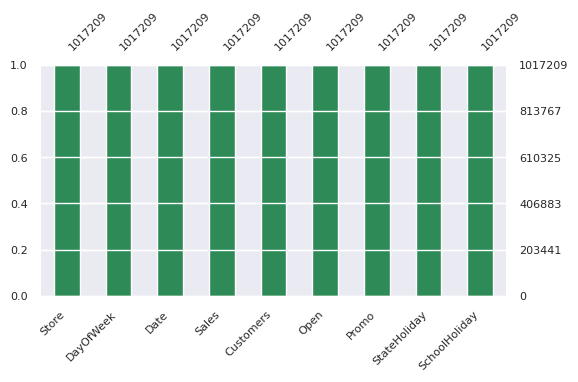

In [10]:
# Visualizing the missing values
msno.bar(store_train, figsize=(6,3), fontsize=8, color="seagreen")


### What did you know about your dataset?

Answer Here

->Dateset has 1017209 rows and 9 columns.

->2 columns are object type and 7 columns are int type.

-> No duplicate value in the dataset.

-> 0 Null value in this dataset.






## ***2. Understanding Your Variables***

In [12]:
# Dataset Describe
store_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00


### Variables Description 

Answer Here

Store: a unique no is assign to the store.

Dayofweek:number of day in a week .

Date: Date are assign here.It obj type so we need to covert it to date.

Sales: the turnover for any given day

Customer:  the number of customers on a given day

Open:an indicator for whether the store was open: 0 = closed, 1 = open

Promo:indicates whether a store is running a promo on that day

StateHoliday:indicates a state holiday. Normally all stores, with few exceptions, are closed on state holidays. Note that all schools are closed on public holidays and weekends. a = public holiday, b = Easter holiday, c = Christmas, 0 = None

SchoolHoliday: indicates if the (Store, Date) was affected by the closure of public schools


### Check Unique Values for each variable.

In [24]:
# Check Unique Values for each variable.

In [25]:
store_train.Store.unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [26]:
store_train.DayOfWeek.unique()

array([5, 4, 3, 2, 1, 7, 6])

In [27]:
store_train.Date.unique()

array(['2015-07-31', '2015-07-30', '2015-07-29', '2015-07-28',
       '2015-07-27', '2015-07-26', '2015-07-25', '2015-07-24',
       '2015-07-23', '2015-07-22', '2015-07-21', '2015-07-20',
       '2015-07-19', '2015-07-18', '2015-07-17', '2015-07-16',
       '2015-07-15', '2015-07-14', '2015-07-13', '2015-07-12',
       '2015-07-11', '2015-07-10', '2015-07-09', '2015-07-08',
       '2015-07-07', '2015-07-06', '2015-07-05', '2015-07-04',
       '2015-07-03', '2015-07-02', '2015-07-01', '2015-06-30',
       '2015-06-29', '2015-06-28', '2015-06-27', '2015-06-26',
       '2015-06-25', '2015-06-24', '2015-06-23', '2015-06-22',
       '2015-06-21', '2015-06-20', '2015-06-19', '2015-06-18',
       '2015-06-17', '2015-06-16', '2015-06-15', '2015-06-14',
       '2015-06-13', '2015-06-12', '2015-06-11', '2015-06-10',
       '2015-06-09', '2015-06-08', '2015-06-07', '2015-06-06',
       '2015-06-05', '2015-06-04', '2015-06-03', '2015-06-02',
       '2015-06-01', '2015-05-31', '2015-05-30', '2015-

In [28]:
store_train.Sales.unique()

array([ 5263,  6064,  8314, ...,   660, 17815, 23303])

In [29]:
store_train.Customers.unique()

array([ 555,  625,  821, ..., 3900,   36, 4065])

In [30]:
store_train.Open.unique()

array([1, 0])

In [31]:
store_train.Promo.unique()

array([1, 0])

In [32]:
store_train.StateHoliday.unique()

array(['0', 'a', 'b', 'c', 0], dtype=object)

In [33]:
store_train.SchoolHoliday.unique()

array([1, 0])

###Convert Date columns int to datetime

In [84]:
# code for changing format of date from object to datetime
store_train['Date'] = pd.to_datetime(store_train['Date'], format= '%Y-%m-%d')


In [85]:
#check first date
store_train['Date'].min()

Timestamp('2013-01-01 00:00:00')

In [86]:
#check last date
store_train['Date'].max()


Timestamp('2015-07-31 00:00:00')

In [90]:
#Change data types object to int 
store_train.loc[store_train['StateHoliday'] == '0', 'StateHoliday'] = 0
store_train.loc[store_train['StateHoliday'] == 'a', 'StateHoliday'] = 1
store_train.loc[store_train['StateHoliday'] == 'b', 'StateHoliday'] = 2
store_train.loc[store_train['StateHoliday'] == 'c', 'StateHoliday'] = 3

#store the value with same column name i.e StateHoliday with function astype
store_train['StateHoliday'] = store_train['StateHoliday'].astype(int, copy=False)

###extract date,year,month ,Week of year


In [88]:
#year extarct
store_train['Year'] = store_train['Date'].apply(lambda x: x.year)

In [89]:
#Month extarct
store_train['Month'] = store_train['Date'].apply(lambda x: x.month)

In [91]:
#Day extract
store_train['Day'] = store_train['Date'].apply(lambda x: x.day)

In [92]:
#Week of year extract
store_train['Weekof year'] = store_train['Date'].apply(lambda x: x.weekofyear)

-> extarct date ,month, year ,Week of date from date comumns and store it into another variable namely Day, Month, Year,Weekofyear.

In [93]:
store_train['Date'].value_counts()

2015-07-31    1115
2013-11-06    1115
2013-11-18    1115
2013-11-17    1115
2013-11-16    1115
              ... 
2014-10-28     935
2014-10-27     935
2014-10-26     935
2014-10-25     935
2014-12-08     935
Name: Date, Length: 942, dtype: int64

In [48]:
store_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 14 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  int64         
 8   SchoolHoliday              1017209 non-null  int64         
 9   Year                       1017209 non-null  int64         
 10  Month                      1017209 non-null  int64         
 11  Day                        1017209 no

In [44]:
store_train. head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekof year
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


###What all manipulations have you done and insights you found?

Answer Here.


Date columns convert to datetime

Extract date into day,month,Year,Weekofyear

#Eda On Rossman Dataset

<Axes: xlabel='DayOfWeek', ylabel='count'>

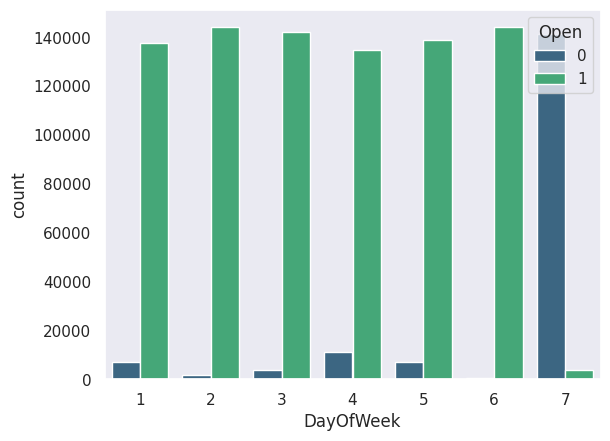

In [61]:
sns.countplot(x='DayOfWeek',hue='Open',data=store_train, palette='viridis')

->we can see stores is closed on sunday(7) most of the time.

In [ ]:
# Value Counts of SchoolHoliday Column
store_train.SchoolHoliday.value_counts(normalize=True)

0    0.821353
1    0.178647
Name: SchoolHoliday, dtype: float64

->we can see that 18 % is state holiday.

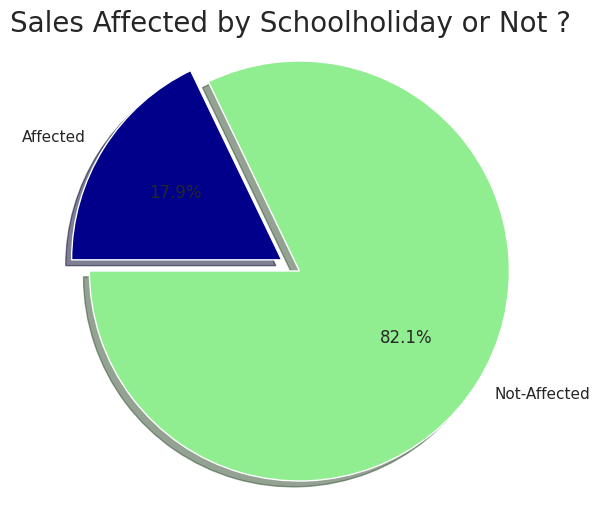

In [69]:
labels = 'Not-Affected' , 'Affected'
sizes = store_train.SchoolHoliday.value_counts()
colors = ['lightgreen','darkblue']
explode = (0.1, 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Sales Affected by Schoolholiday or Not ?",fontsize=20)
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

->As we can see in the Piechart  Sales aren't afffected by School Holiday

<Axes: xlabel='Promo', ylabel='Sales'>

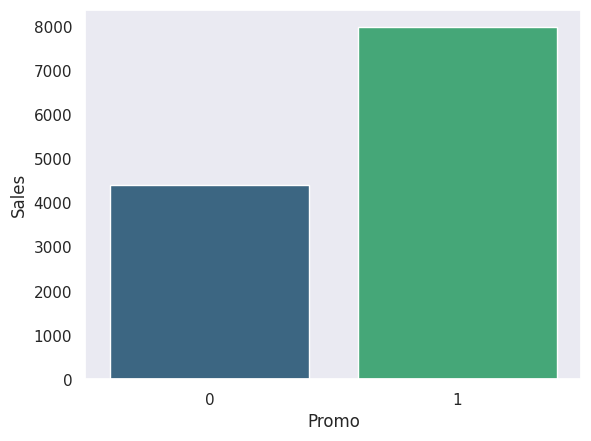

In [62]:
#Impact of promo on sales
Promo_sales = pd.DataFrame(store_train.groupby('Promo').agg({'Sales':'mean'}))
sns.barplot(x=Promo_sales.index, y = Promo_sales['Sales'], palette='viridis')

->Sales Are nearly doubled High When Promo is Running

Text(0.5, 1.0, 'Plot between Sales and DayOfWeek')

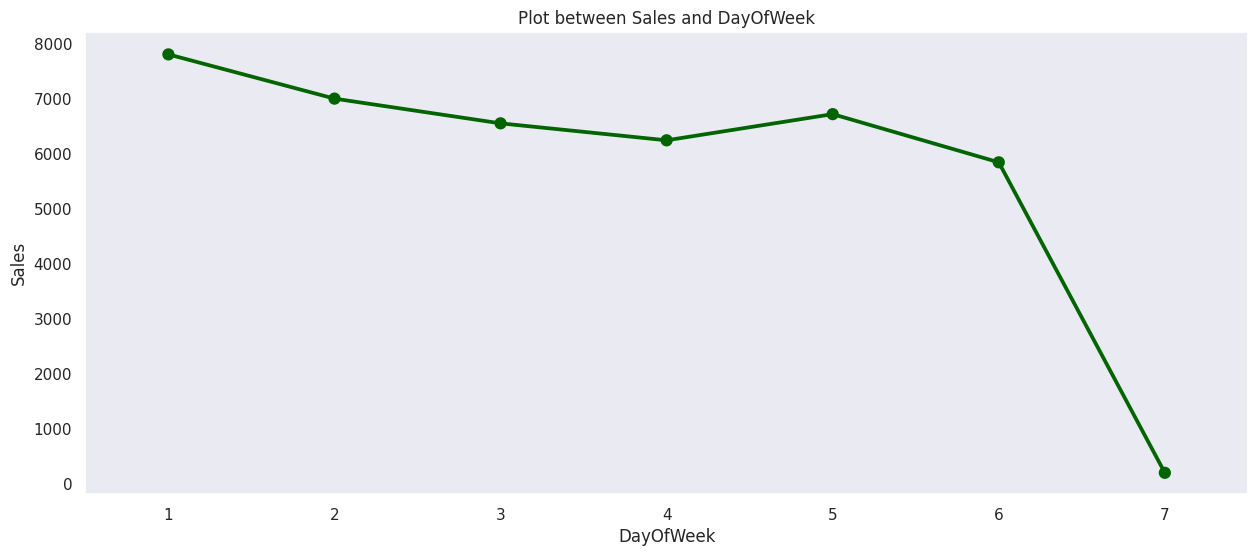

In [71]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'DayOfWeek', y= 'Sales', data=store_train,color='darkgreen')
sns.set_style("dark")
plt.title('Plot between Sales and DayOfWeek')

Text(0.5, 1.0, 'Store Daily Promo Countplot')

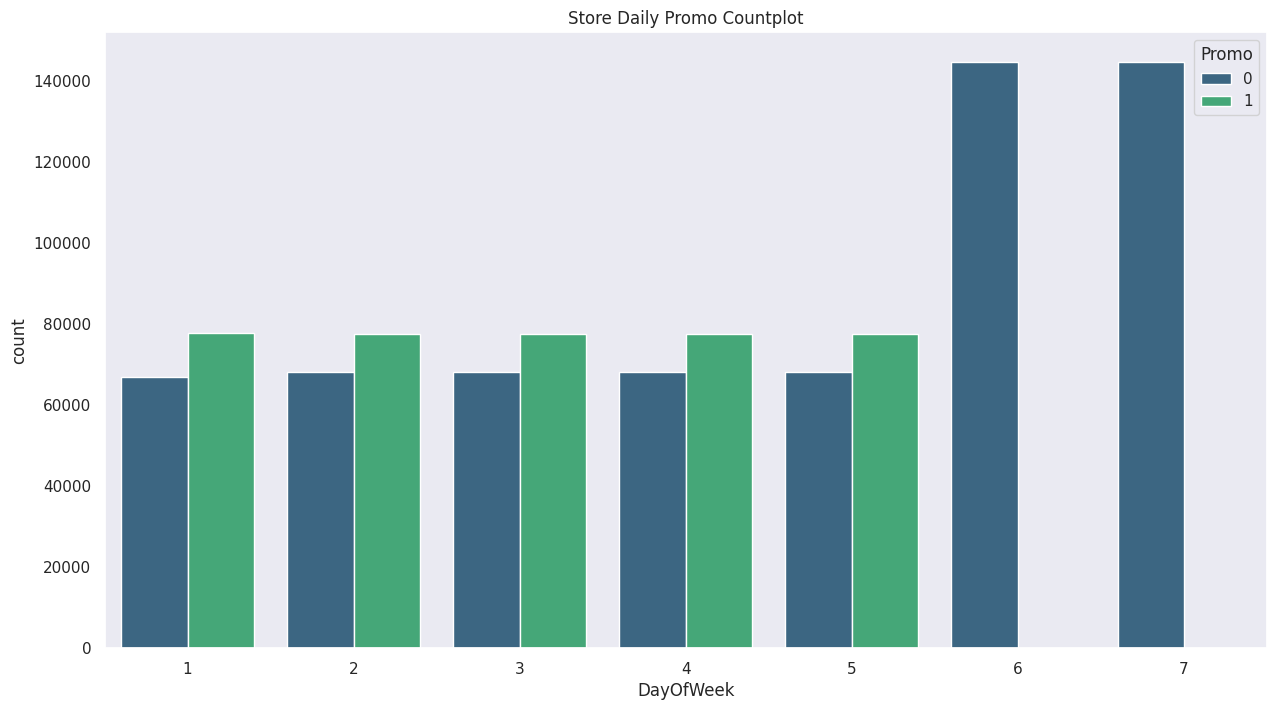

In [58]:
plt.figure(figsize=(15, 8))
sns.countplot(x= 'DayOfWeek', hue='Promo', data= store_train, palette='viridis')
plt.title('Store Daily Promo Countplot')

<Axes: xlabel='StateHoliday', ylabel='Sales'>

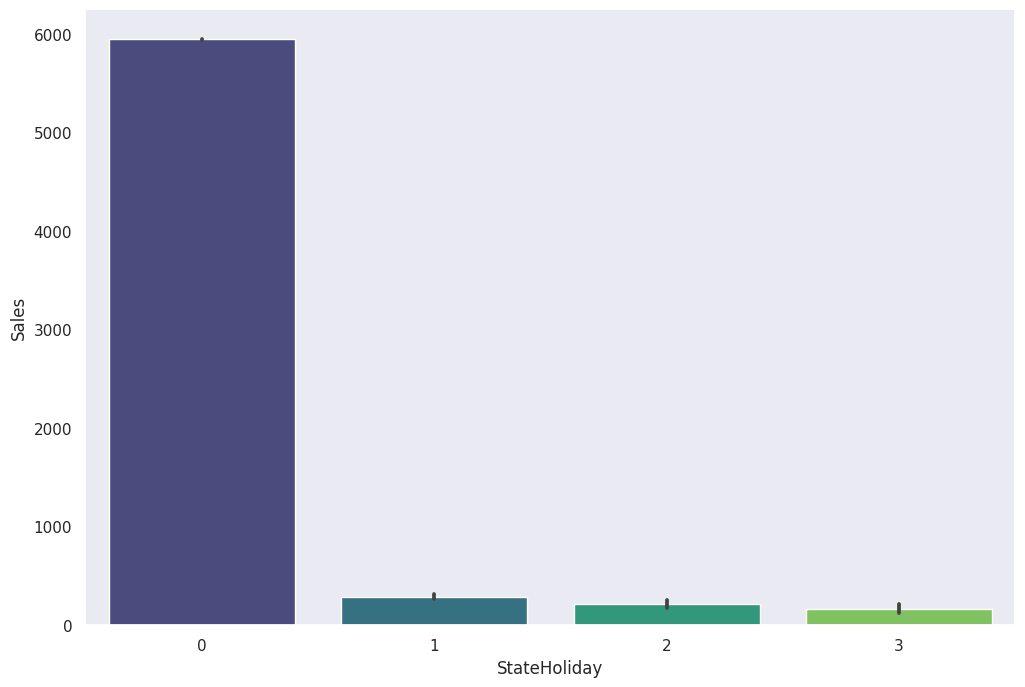

In [60]:

plt.figure(figsize=(12, 8))
sns.barplot(x="StateHoliday", y="Sales", data=store_train,palette='viridis')

In [ ]:
# sns.countplot(x='SchoolHoliday',hue='Sales',data=store_train)

<Axes: xlabel='Year', ylabel='count'>

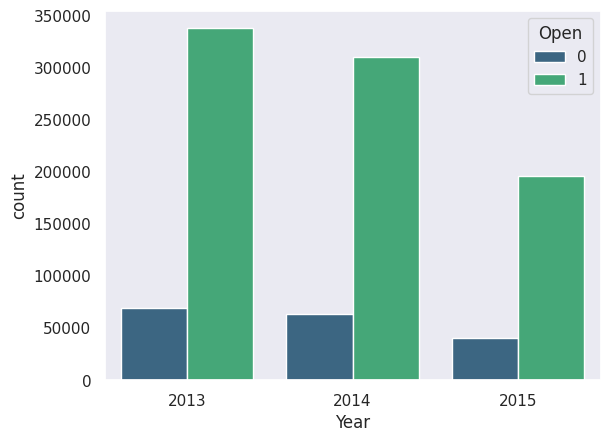

In [63]:
sns.countplot(x='Year',hue='Open',data=store_train, palette='viridis')

->2013 highest open 

Q.Which date has highest sales?

Q.Which store has highest Sales?

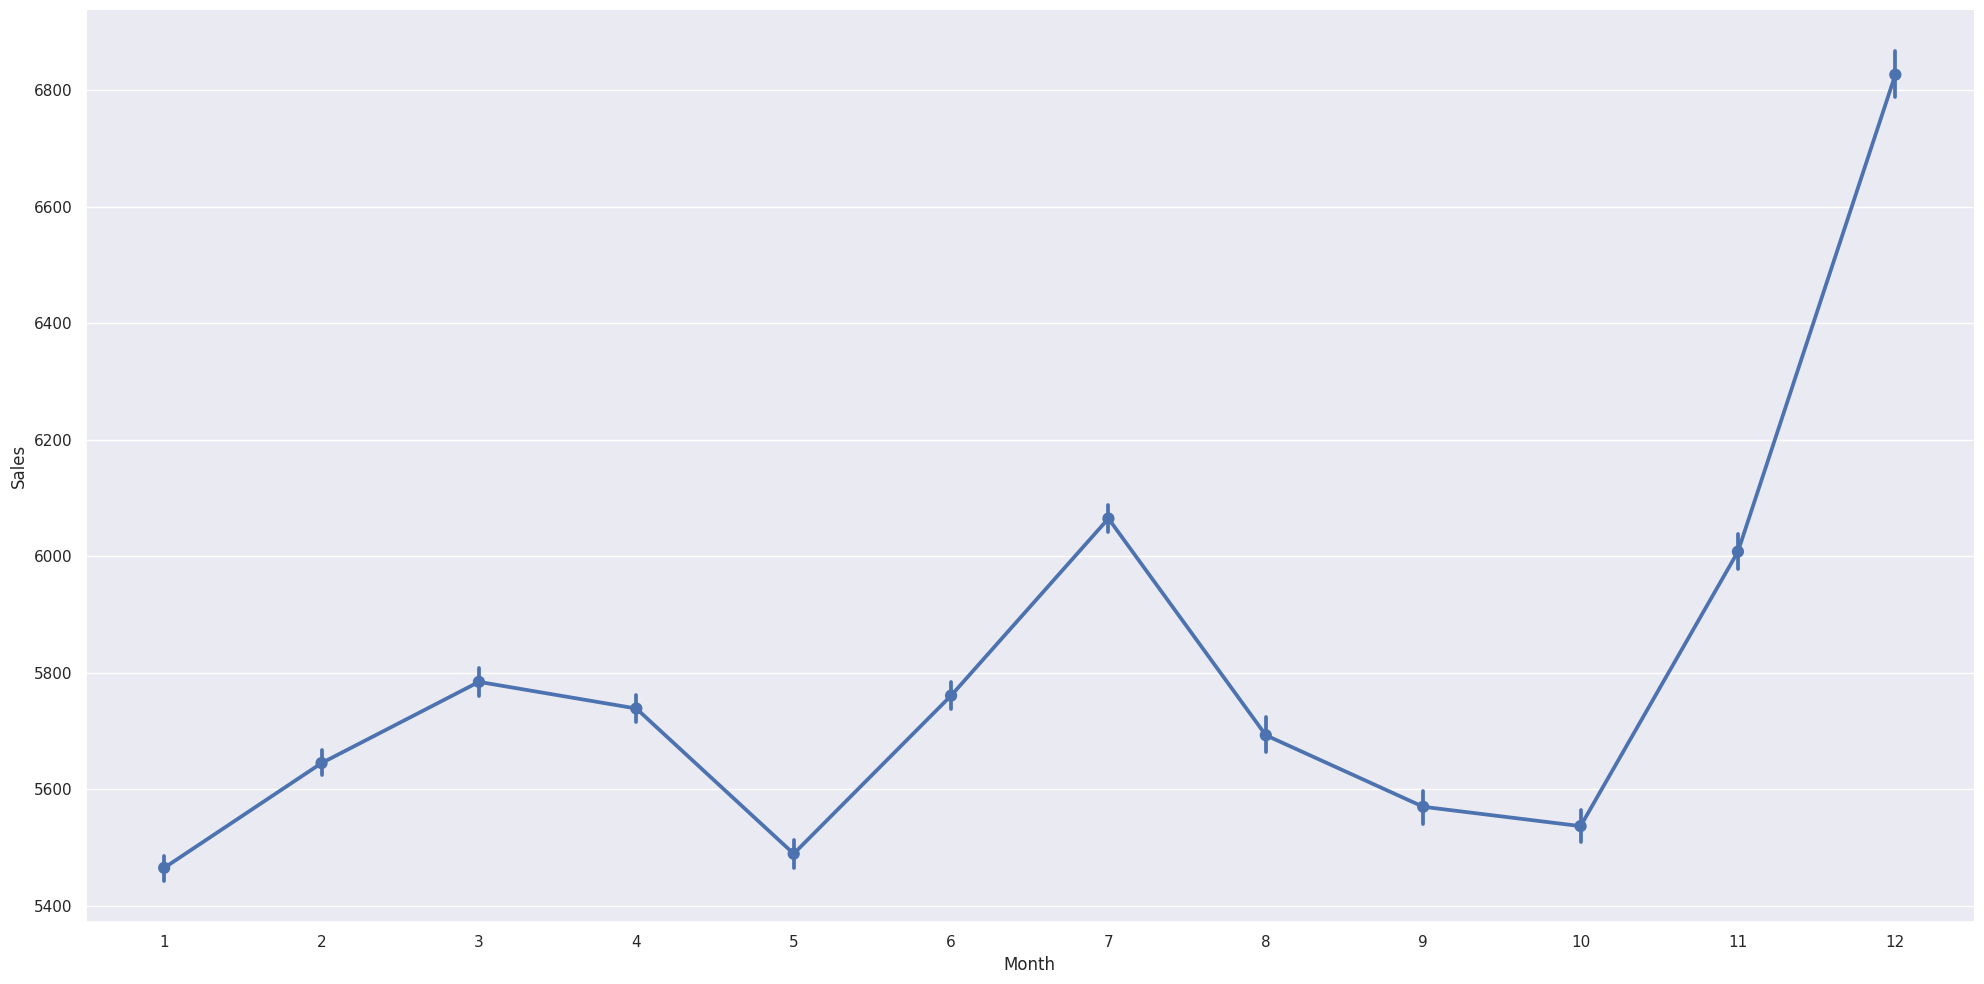

In [ ]:
sns.catplot(x="Month" ,y = "Sales" , data=store_train, kind="point", aspect=2,height=10)

->As We can see that In the month of November and Specially in December Sales is increasing Rapidly every year on the christmas eve.

In [112]:
store_train["Sales"].value_counts()

0        172871
5674        215
5558        197
5483        196
6214        195
          ...  
23806         1
24183         1
20651         1
25083         1
23303         1
Name: Sales, Length: 21734, dtype: int64

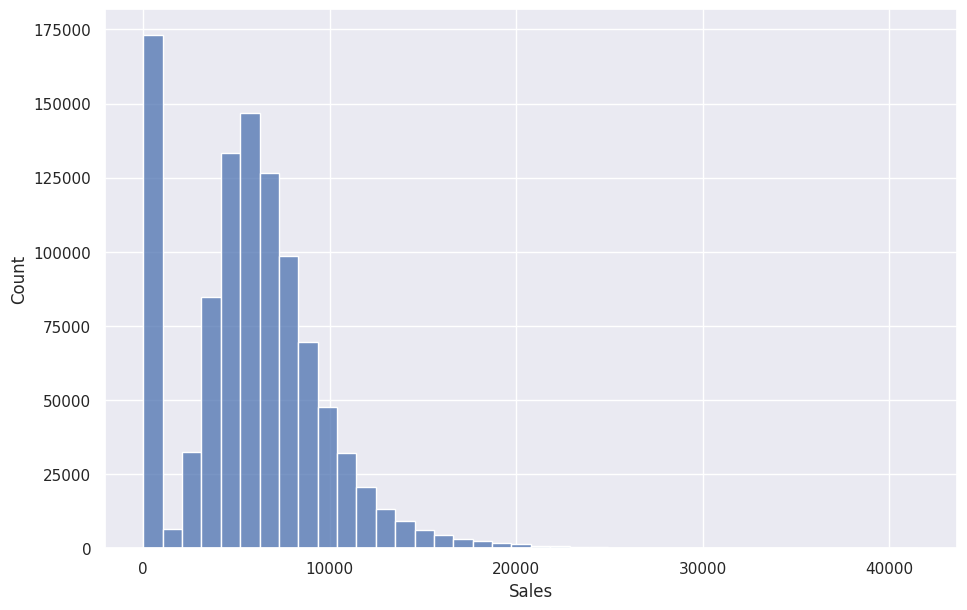

In [ ]:
#distribution of sales
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
sns.histplot(store_train['Sales'], kde = False,bins=40);


->Histogram Representation of Sales. Here 0 is showing because most of the time store was closed.

In [ ]:
#linear relation between sales and customers
# sns.lmplot(x= 'Sales' , y ='Customers',data=store_train, palette='seismic', height=5,aspect=1, line_kws={'color':'blue'});

<ipython-input-74-787f872c58e7>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x='Year',y='Sales',data=store_train, height=4, aspect=4, palette='viridis' );


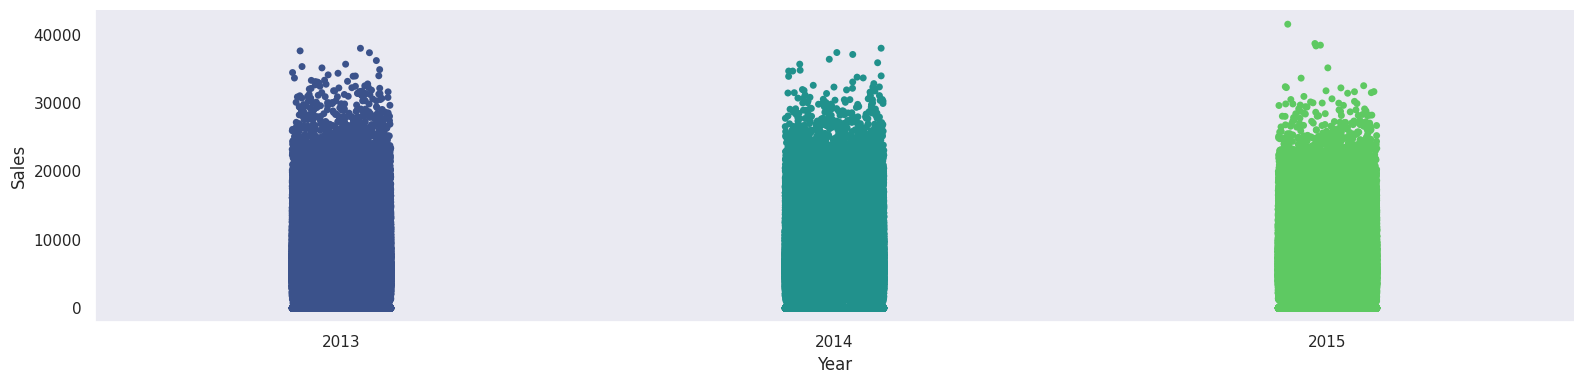

In [74]:
#plotting year vs sales
sns.catplot(x='Year',y='Sales',data=store_train, height=4, aspect=4, palette='viridis' );

->->We can see that there is not such significant differences in these 3 years in terms of sales.

<ipython-input-75-f9866fbc0186>:2: FutureWarning: Passing `palette` without assigning `hue` is deprecated.
  sns.catplot(x='Day',y='Sales',data=store_train, height=4, aspect=4, palette='viridis' );


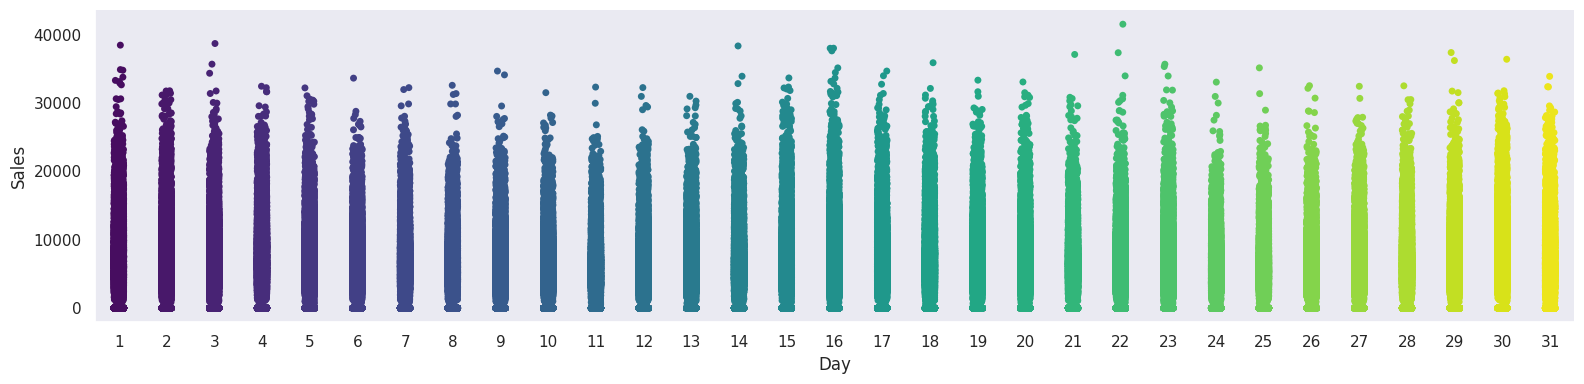

In [75]:
#plotting year vs sales
sns.catplot(x='Day',y='Sales',data=store_train, height=4, aspect=4, palette='viridis' );

In [77]:
# Value Counts of SchoolHoliday Column
store_train.Day.value_counts()

16    33485
17    33485
6     33485
7     33485
8     33485
9     33485
10    33485
11    33485
12    33485
13    33485
14    33485
15    33485
3     33485
18    33485
4     33485
19    33485
20    33485
21    33485
22    33485
23    33485
24    33485
25    33485
26    33485
27    33485
28    33485
2     33485
5     33485
1     33484
30    30140
29    30140
31    19350
Name: Day, dtype: int64

In [ ]:
# # remove features
# store_train = store_train.drop(['StateHoliday'], axis=1)

In [94]:
store_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekof year
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,7,31,31


#***Analyze the Store dataset***

###Dataset First View

In [95]:
# Dataset First Look
store_test.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [96]:
#tail of the dataset
store_test.tail()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN
1114,1115,d,c,5350.0,NaN,NaN,1,22.0,2012.0,"Mar,Jun,Sept,Dec"


###Dataset Rows & Columns count

In [ ]:
#rows and columns count
store_test.shape

(1115, 10)

###Dataset Information

In [ ]:
# Dataset Info
store_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


###Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
store_test.duplicated().sum()

0

###Missing Values/Null Values

In [97]:
# Missing Values/Null Values Count
store_test.isna().sum()

Store                          0
StoreType                      0
Assortment                     0
CompetitionDistance            3
CompetitionOpenSinceMonth    354
CompetitionOpenSinceYear     354
Promo2                         0
Promo2SinceWeek              544
Promo2SinceYear              544
PromoInterval                544
dtype: int64

<Axes: >

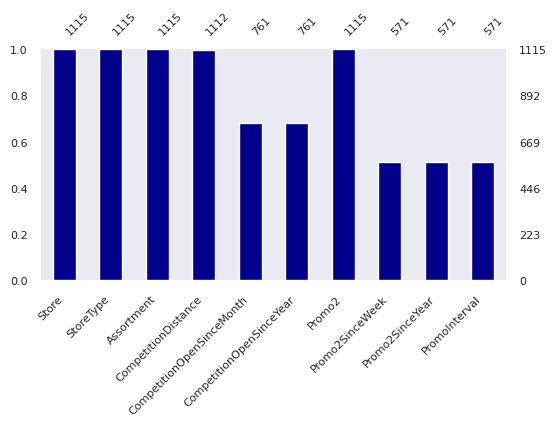

In [99]:
# Visualizing the missing values
msno.bar(store_test, figsize=(6,3), fontsize=8, color="darkblue")

###What did you know about your dataset?

Answer Here:

->Data set has 1115 rows and 10 columns.

->Almost 6 columns have null value.

->Dataset has 5 float type columns, 2 object types columns and  3 object types columns.

->Need to convert some float to int for accurat observation.

->4 columns  of the dataset which hasn't any null values.


###Understanding Your Variables

In [ ]:
# Dataset Describe
store_test.describe()

,Store,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1112.000000,761.000000,761.000000,1115.000000,571.000000,571.000000
mean,558.00000,5404.901079,7.224704,2008.668857,0.512108,23.595447,2011.763573
std,322.01708,7663.174720,3.212348,6.195983,0.500078,14.141984,1.674935
min,1.00000,20.000000,1.000000,1900.000000,0.000000,1.000000,2009.000000
25%,279.50000,717.500000,4.000000,2006.000000,0.000000,13.000000,2011.000000
50%,558.00000,2325.000000,8.000000,2010.000000,1.000000,22.000000,2012.000000
75%,836.50000,6882.500000,10.000000,2013.000000,1.000000,37.000000,2013.000000
max,1115.00000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


###Variables Description

Answer Here

Store- Index value 

Store- Store type is assign here .Here 3 types of unique value i.e. a,b,c,d

Assortment- 3 unique value a,c,b and nan value is 0.

CompetitionDistance: Here distance are define. It has some nall  values.

CompetitionOpenSinceMonth: here months are define ,but nall value is shown.It is float value so need to convert float to date.

CompetitionOpenSinceYear: number of  competition year . but it has some null value and need to remove ' .' from this column.it need to convert float to date.

Promo2:it has two binary  value 1 and 0. and has 1115 rows which means no nall value present in this column.

Promo2SinceWeek: No of promo week,it has null value. It need to covert float to int value.

Promo2SinceYear:Number of promo year , it has null value and nned to convert float to int.

PromoInterval:It has some group of month .it has some null value.

###Check Unique Values for each variable.

In [ ]:
#Check Unique Values for each variable.
store_test.Store.unique()

array([   1,    2,    3, ..., 1113, 1114, 1115])

In [ ]:
store_test.StoreType.unique()

array(['c', 'a', 'd', 'b'], dtype=object)

In [ ]:
store_test.Assortment.unique()

array(['a', 'c', 'b'], dtype=object)

In [ ]:
store_test.CompetitionDistance.unique()

array([1.270e+03, 5.700e+02, 1.413e+04, 6.200e+02, 2.991e+04, 3.100e+02,
       2.400e+04, 7.520e+03, 2.030e+03, 3.160e+03, 9.600e+02, 1.070e+03,
       1.300e+03, 4.110e+03, 3.270e+03, 5.000e+01, 1.384e+04, 3.240e+03,
       2.340e+03, 5.500e+02, 1.040e+03, 4.060e+03, 4.590e+03, 4.300e+02,
       2.300e+03, 6.000e+01, 1.200e+03, 2.170e+03, 4.000e+01, 9.800e+03,
       2.910e+03, 1.320e+03, 2.240e+03, 7.660e+03, 5.400e+02, 4.230e+03,
       1.090e+03, 2.600e+02, 1.800e+02, 1.180e+03, 2.900e+02, 4.880e+03,
       9.710e+03, 2.700e+02, 1.060e+03, 1.801e+04, 6.260e+03, 1.057e+04,
       4.500e+02, 3.036e+04, 7.170e+03, 7.200e+02, 6.620e+03, 4.200e+02,
       7.340e+03, 2.840e+03, 5.540e+03, 3.500e+02, 2.050e+03, 3.700e+03,
       2.256e+04, 4.100e+02, 2.500e+02, 1.130e+03, 4.840e+03, 1.750e+04,
       2.200e+03, 1.650e+03, 3.300e+02, 2.244e+04, 1.996e+04, 3.510e+03,
       3.320e+03, 7.910e+03, 2.370e+03, 2.239e+04, 2.710e+03, 1.181e+04,
       1.870e+03, 4.800e+02, 5.600e+02, 1.069e+04, 

In [ ]:
store_test.CompetitionOpenSinceMonth .unique()

array([ 9., 11., 12.,  4., 10.,  8., nan,  3.,  6.,  5.,  1.,  2.,  7.])

In [ ]:
store_test.CompetitionOpenSinceYear.unique()

array([2008., 2007., 2006., 2009., 2015., 2013., 2014., 2000., 2011.,
         nan, 2010., 2005., 1999., 2003., 2012., 2004., 2002., 1961.,
       1995., 2001., 1990., 1994., 1900., 1998.])

In [ ]:
store_test.Promo2.unique()

array([0, 1])

In [ ]:
store_test.Promo2SinceWeek  .unique()

array([nan, 13., 14.,  1., 45., 40., 26., 22.,  5.,  6., 10., 31., 37.,
        9., 39., 27., 18., 35., 23., 48., 36., 50., 44., 49., 28.])

In [ ]:
store_test.Promo2SinceYear.unique()

array([  nan, 2010., 2011., 2012., 2009., 2014., 2015., 2013.])

In [ ]:
store_test.PromoInterval  .unique()

array([nan, 'Jan,Apr,Jul,Oct', 'Feb,May,Aug,Nov', 'Mar,Jun,Sept,Dec'],
      dtype=object)

In [ ]:
store_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1112 non-null   float64
 4   CompetitionOpenSinceMonth  761 non-null    float64
 5   CompetitionOpenSinceYear   761 non-null    float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            571 non-null    float64
 8   Promo2SinceYear            571 non-null    float64
 9   PromoInterval              571 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


###replace nan to 0

In [102]:
store_test=store_test.fillna(0)

In [103]:
store_test.isna().sum()

Store                        0
StoreType                    0
Assortment                   0
CompetitionDistance          0
CompetitionOpenSinceMonth    0
CompetitionOpenSinceYear     0
Promo2                       0
Promo2SinceWeek              0
Promo2SinceYear              0
PromoInterval                0
dtype: int64

###Converting float to int

In [104]:
# code for change float into integer 
store_test['CompetitionOpenSinceYear']= store_test['CompetitionOpenSinceYear'].astype(int)
store_test['Promo2SinceYear']= store_test['Promo2SinceYear'].astype(int)

In [105]:
# code for change float into integer 
store_test['CompetitionDistance']= store_test['CompetitionDistance'].astype(int)
store_test['Promo2SinceWeek']= store_test['Promo2SinceWeek'].astype(int)

In [107]:
# code for change object into date format
store_test['CompetitionOpenSinceMonth'] = store_test['CompetitionOpenSinceMonth'] .astype(int)

###change object to int

In [110]:
# change Data Types object into int 
store_test.loc[store_test['StoreType'] == 'a', 'StoreType'] = 0
store_test.loc[store_test['StoreType'] == 'b', 'StoreType'] = 1
store_test.loc[store_test['StoreType'] == 'c', 'StoreType'] = 2
store_test.loc[store_test['StoreType'] == 'd', 'StoreType'] = 3
#store the value with same column name i.e Assortment with function astype
store_test['StoreType'] = store_test['StoreType'].astype(int, copy=False)

In [111]:
# change Data Types object into int 
store_test.loc[store_test['Assortment'] == 'a', 'Assortment'] = 0
store_test.loc[store_test['Assortment'] == 'b', 'Assortment'] = 1
store_test.loc[store_test['Assortment'] == 'c', 'Assortment'] = 2
#store the value with same column name i.e Assortment with function astype
store_test['Assortment'] = store_test['Assortment'].astype(int, copy=False)

In [114]:
store_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Store                      1115 non-null   int64 
 1   StoreType                  1115 non-null   int64 
 2   Assortment                 1115 non-null   int64 
 3   CompetitionDistance        1115 non-null   int64 
 4   CompetitionOpenSinceMonth  1115 non-null   int64 
 5   CompetitionOpenSinceYear   1115 non-null   int64 
 6   Promo2                     1115 non-null   int64 
 7   Promo2SinceWeek            1115 non-null   int64 
 8   Promo2SinceYear            1115 non-null   int64 
 9   PromoInterval              1115 non-null   object
dtypes: int64(9), object(1)
memory usage: 87.2+ KB


In [113]:
store_test.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,2,0,1270,9,2008,0,0,0,0
1,2,0,0,570,11,2007,1,13,2010,"Jan,Apr,Jul,Oct"
2,3,0,0,14130,12,2006,1,14,2011,"Jan,Apr,Jul,Oct"
3,4,2,2,620,9,2009,0,0,0,0
4,5,0,0,29910,4,2015,0,0,0,0


###Cleaning

In [116]:
# remove features
store_test = store_test.drop([ 'PromoInterval'], axis=1)

###Eda on store Dataset

Distribution Of Different Store Types

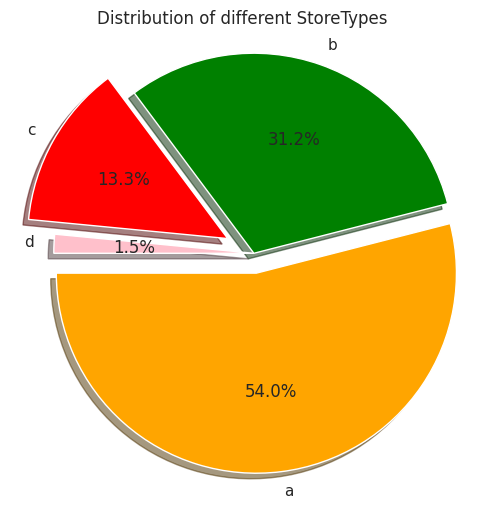

In [118]:
labels = 'a' , 'b' , 'c' , 'd'
sizes = store_test.StoreType.value_counts()
colors = ['orange', 'green' , 'red' , 'pink']
explode = (0.1, 0.0 , 0.15 , 0.0)
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=180)
plt.axis('equal')
plt.title("Distribution of different StoreTypes")
plt.plot()
fig=plt.gcf()
fig.set_size_inches(6,6)
plt.show()

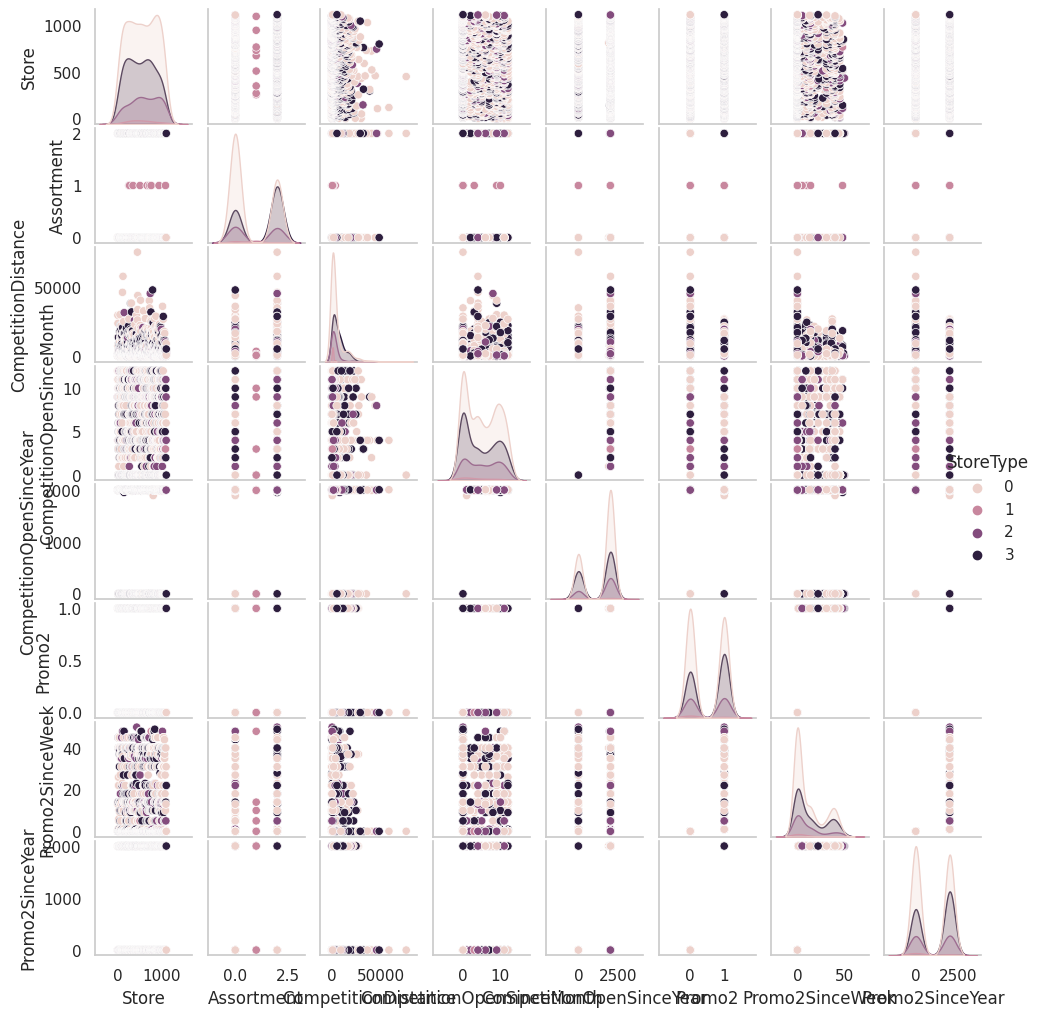

In [119]:
#pairplot for store dataset
sns.set_style("whitegrid", {'axes.grid' : False})
pp=sns.pairplot(store_test,hue='StoreType')
pp.fig.set_size_inches(10,10);

Checking stores with their assortment type

0=a, 1=b 2=c

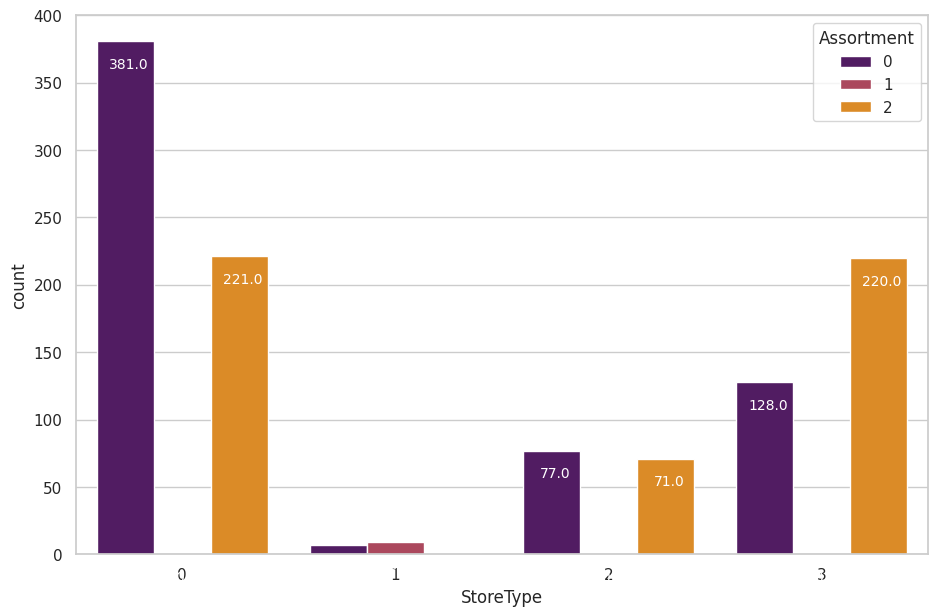

In [120]:
#checking stores with their assortment type 
sns.set_style("whitegrid")
fig, ax = plt.subplots()
fig.set_size_inches(11, 7)
store_type=sns.countplot(x='StoreType',hue='Assortment', data=store_test,palette="inferno")

for p in store_type.patches:
    store_type.annotate(f'\n{p.get_height()}', (p.get_x()+0.15, p.get_height()),ha='center', va='top', color='white', size=10)

## 4.Data Wrangling

### Data Wrangling Code

In [117]:
# Write your code to make your dataset analysis ready.
#check outliers
store_test.describe()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
count,1115.00000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000,1115.000000
mean,558.00000,1.217040,0.928251,5390.358744,4.930942,1370.939013,0.512108,12.083408,1030.239462
std,322.01708,1.369544,0.993814,7657.973705,4.284924,935.467654,0.500078,15.542241,1006.038782
min,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,279.50000,0.000000,0.000000,710.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,558.00000,0.000000,0.000000,2320.000000,4.000000,2006.000000,1.000000,1.000000,2009.000000
75%,836.50000,3.000000,2.000000,6875.000000,9.000000,2011.000000,1.000000,22.000000,2012.000000
max,1115.00000,3.000000,2.000000,75860.000000,12.000000,2015.000000,1.000000,50.000000,2015.000000


In [122]:
# #Check outlier 
# columns = ['Store',	'CompetitionDistance',	'CompetitionOpenSinceMonth'	,'CompetitionOpenSinceYear'	,'Promo2','Promo2SinceWeek','Promo2SinceYear']
# n = 1
# plt.figure(figsize=(20,15))

# for column in columns:
#   plt.subplot(4,4,n)
#   n = n+1
#   sns.boxplot(store_train[column])
#   plt.tight_layout()

->see some outliers in compitiors distance

Text(0.5, 1.0, 'Distributin of Store Competition Distance')

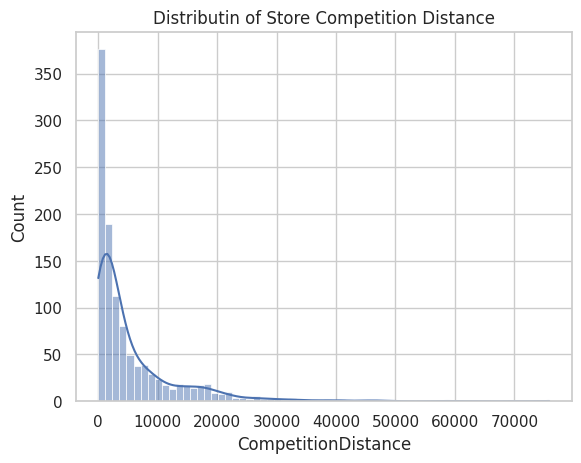

In [123]:
# CompetitionDistance is distance in meters to the nearest competitor store
# let's first have a look at its distribution

sns.histplot(store_test['CompetitionDistance'],kde=True)
plt.title("Distributin of Store Competition Distance")

In [ ]:
store_train.describe()

,Store,DayOfWeek,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,Weekof year
count,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06,1.017209e+06
mean,5.584297e+02,3.998341e+00,5.773819e+03,6.331459e+02,8.301067e-01,3.815145e-01,1.786467e-01,2.013832e+03,5.846762e+00,1.570279e+01,2.361551e+01
std,3.219087e+02,1.997391e+00,3.849926e+03,4.644117e+02,3.755392e-01,4.857586e-01,3.830564e-01,7.773960e-01,3.326097e+00,8.787638e+00,1.443338e+01
min,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,1.000000e+00,1.000000e+00,1.000000e+00
25%,2.800000e+02,2.000000e+00,3.727000e+03,4.050000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.013000e+03,3.000000e+00,8.000000e+00,1.100000e+01
50%,5.580000e+02,4.000000e+00,5.744000e+03,6.090000e+02,1.000000e+00,0.000000e+00,0.000000e+00,2.014000e+03,6.000000e+00,1.600000e+01,2.200000e+01
75%,8.380000e+02,6.000000e+00,7.856000e+03,8.370000e+02,1.000000e+00,1.000000e+00,0.000000e+00,2.014000e+03,8.000000e+00,2.300000e+01,3.500000e+01
max,1.115000e+03,7.000000e+00,4.155100e+04,7.388000e+03,1.000000e+00,1.000000e+00,1.000000e+00,2.015000e+03,1.200000e+01,3.100000e+01,5.200000e+01


->now remove all outlier

### What all manipulations have you done and insights you found?

Answer Here.



 Remove all null value with 0

Check for duplicate value

covert some float value to int 

check outlier ,and find compititionDisatnce has outlier and remove outlier

our data is now clean












In [124]:
store_test.head()

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,2,0,1270,9,2008,0,0,0
1,2,0,0,570,11,2007,1,13,2010
2,3,0,0,14130,12,2006,1,14,2011
3,4,2,2,620,9,2009,0,0,0
4,5,0,0,29910,4,2015,0,0,0


In [ ]:
store_train.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,Weekof year
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,31
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,31
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,31,31
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,31
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,31


#Merge two dataset

In [125]:
store = pd.merge(store_train, store_test, how='left', on='Store')
store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Year,...,Day,Weekof year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,2015-07-31,5263,555,1,1,0,1,2015,...,31,31,2,0,1270,9,2008,0,0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,2015,...,31,31,0,0,570,11,2007,1,13,2010
2,3,5,2015-07-31,8314,821,1,1,0,1,2015,...,31,31,0,0,14130,12,2006,1,14,2011
3,4,5,2015-07-31,13995,1498,1,1,0,1,2015,...,31,31,2,2,620,9,2009,0,0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,2015,...,31,31,0,0,29910,4,2015,0,0,0


In [126]:
store.shape

(1017209, 21)

#Eda on Merge dataset

##***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,Weekof year,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,31,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,31,a,a,29910.0,0


<ipython-input-128-c66dbab84732>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = store.corr()


<Axes: >

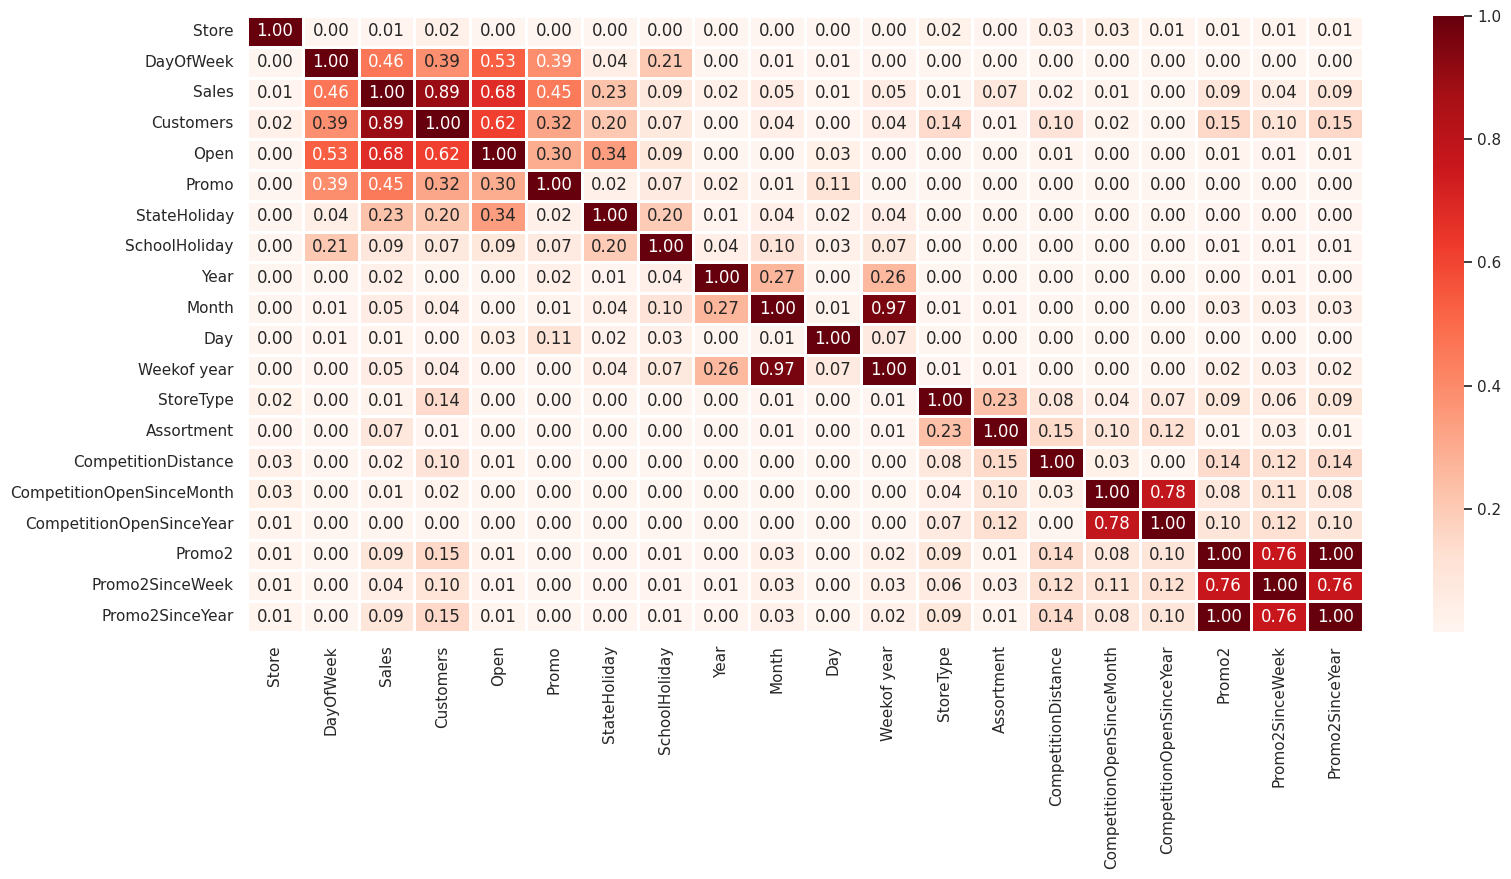

In [128]:
plt.figure(figsize=(18,8))
correlation = store.corr()
sns.heatmap(abs(correlation), annot=True, cmap='Reds',linewidths=2,fmt=".2f")

The color of the cell indicates the direction and strength of the correlation: a positive correlation is indicated by a warm color (such as Red) and a negative correlation is indicated by a cool color (such as Orange).The intensity of the color represents the strength of the correlation.



Text(0.5, 1.0, 'Plot between Sales and Competition Open Since year')

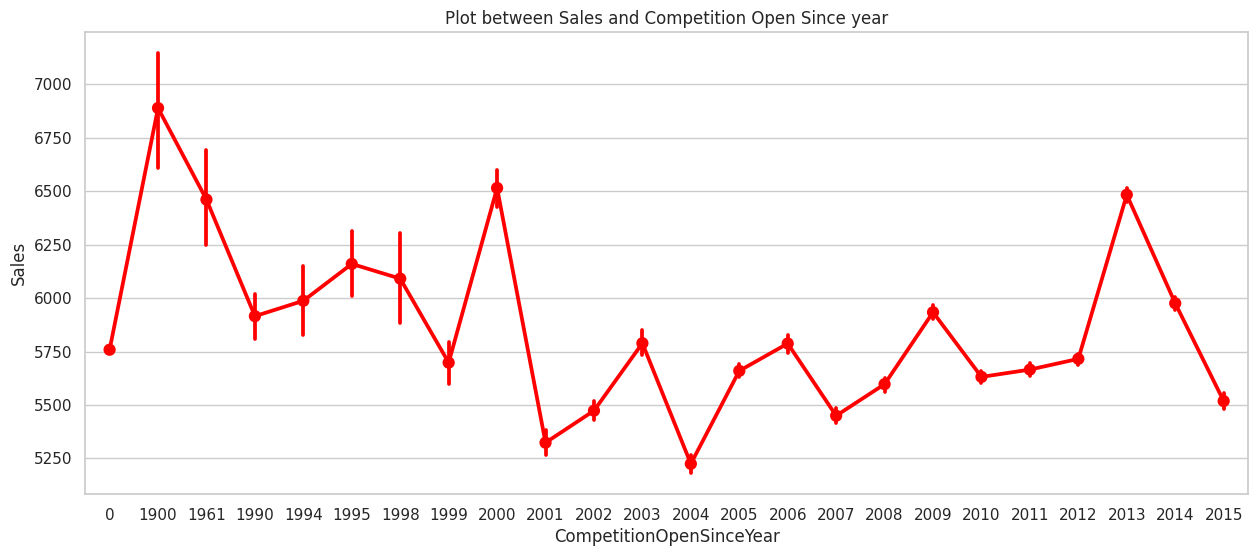

In [130]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceYear', y= 'Sales', data=store,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and Competition Open Since year')

Text(0.5, 1.0, 'Plot between Sales and Promo2SinceYear')

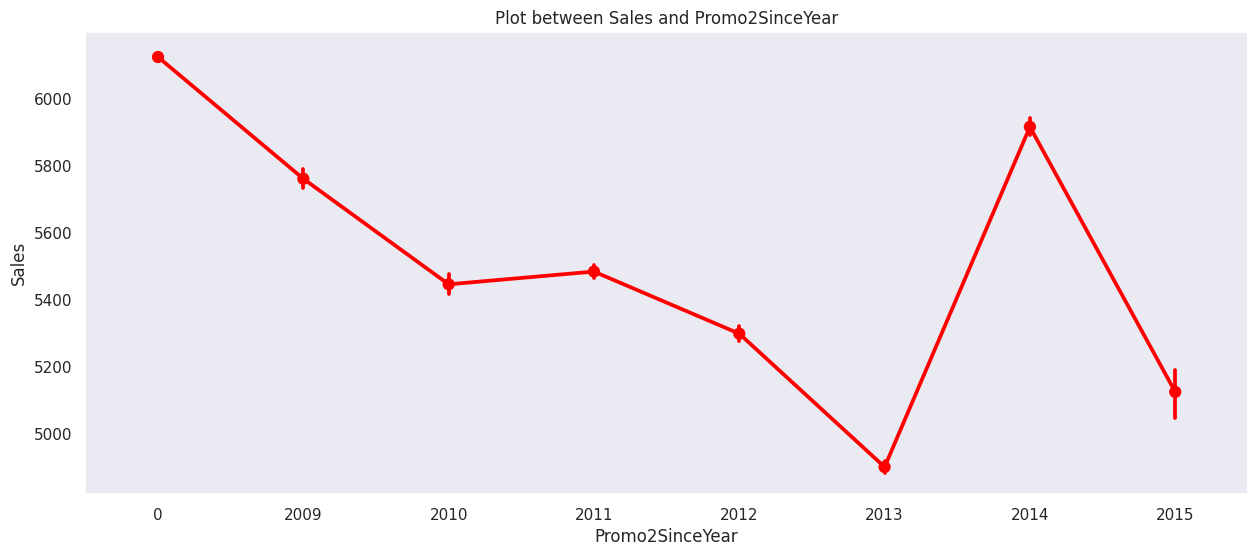

In [131]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'Promo2SinceYear', y= 'Sales', data=store,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and Promo2SinceYear')


From This Graph We saw that sales of stores is effected which continues their promotion.The Sales in 2013 and 2015 are very low inspite of promotion.The reason can be more competiton year by year.

Text(0.5, 1.0, 'Plot between Sales and CompetitionOpenSinceMonth ')

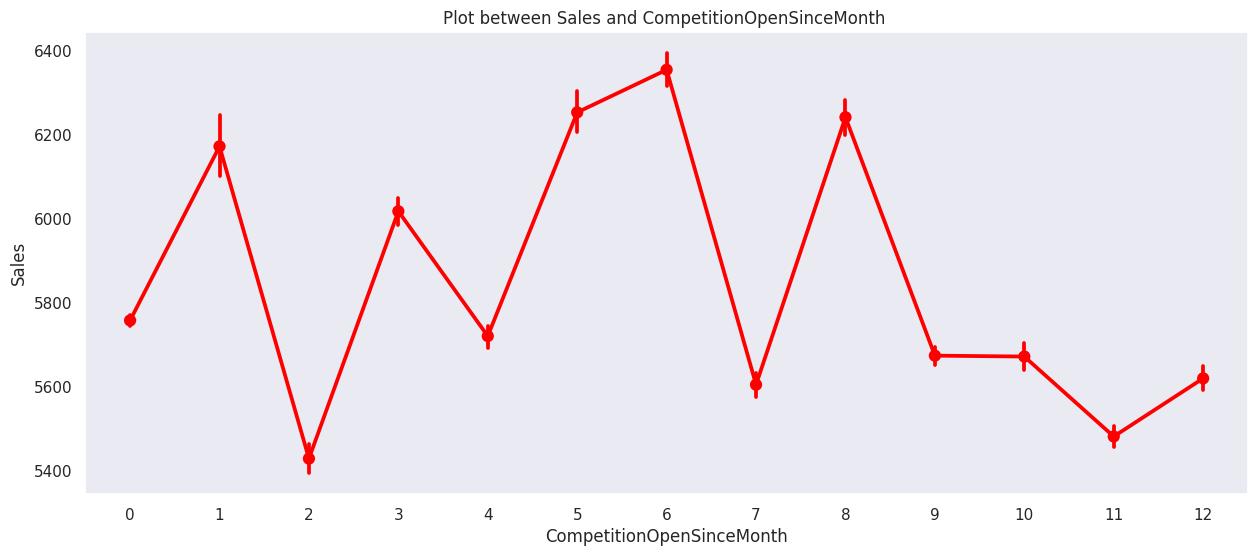

In [133]:
plt.figure(figsize=(15,6))
sns.pointplot(x= 'CompetitionOpenSinceMonth', y= 'Sales', data=store,color='Red')
sns.set_style("dark")
plt.title('Plot between Sales and CompetitionOpenSinceMonth ')

Text(0.5, 1.0, 'Boxplot For Sales Values')

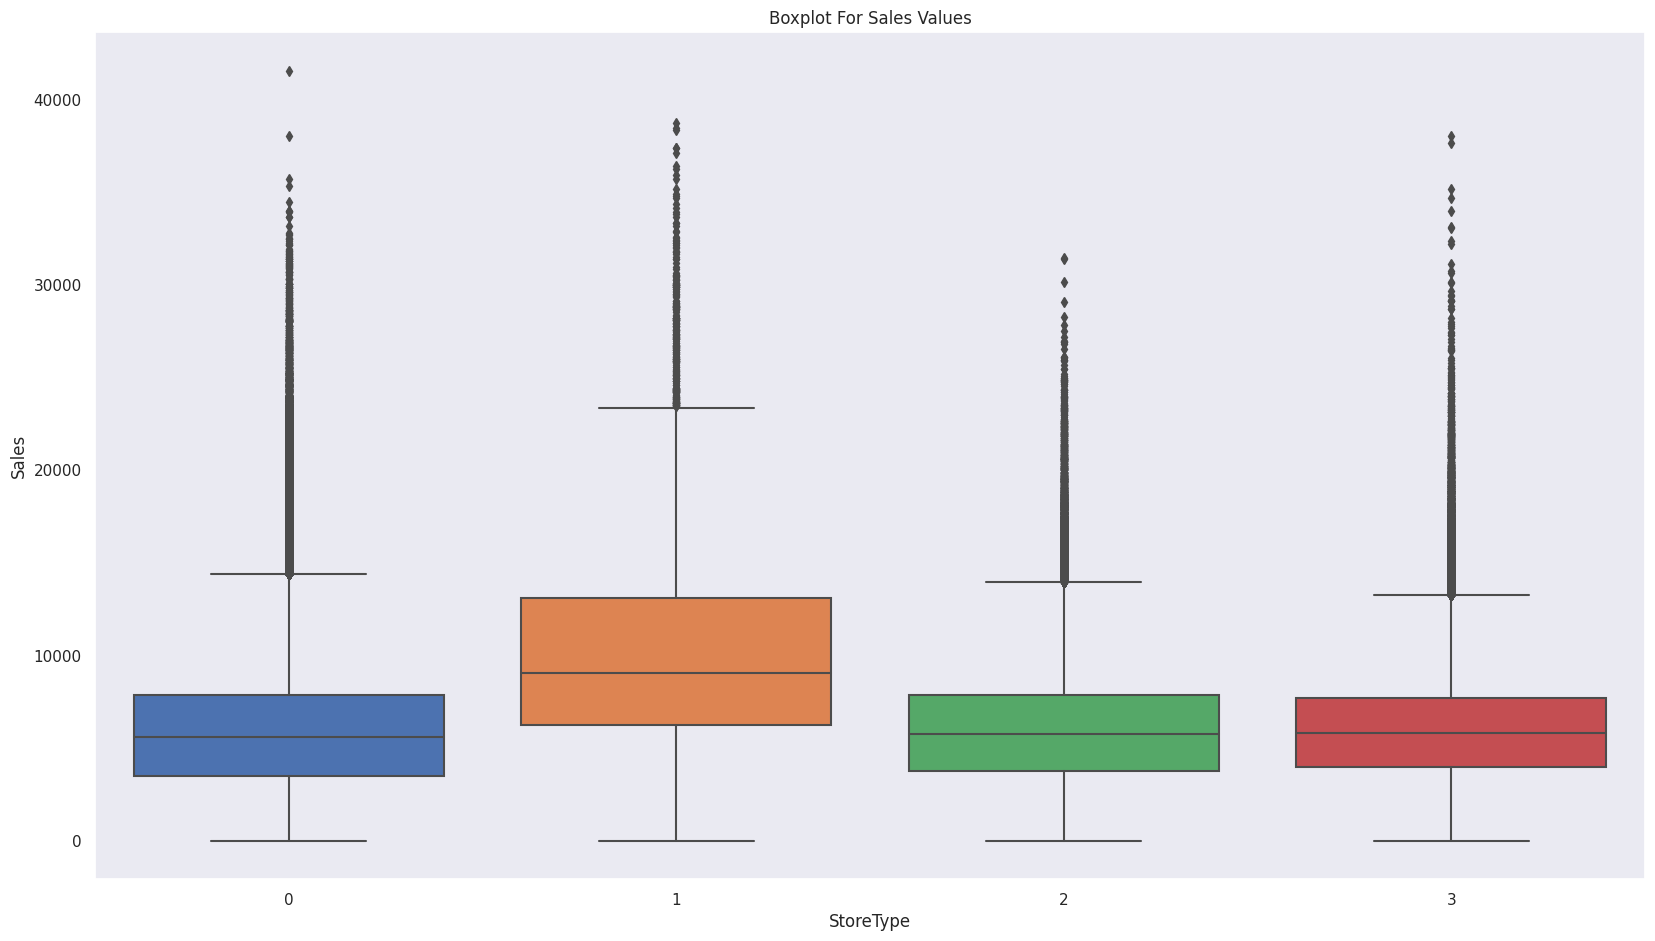

In [134]:
plt.figure(figsize=(20, 11))
plot_storetype_sales = sns.boxplot(x="StoreType", y="Sales", data=store, saturation=1.5,width=0.8)
plt.title('Boxplot For Sales Values')

Text(0.5, 1.0, 'Boxplot For Sales Values on the basis of Assortment')

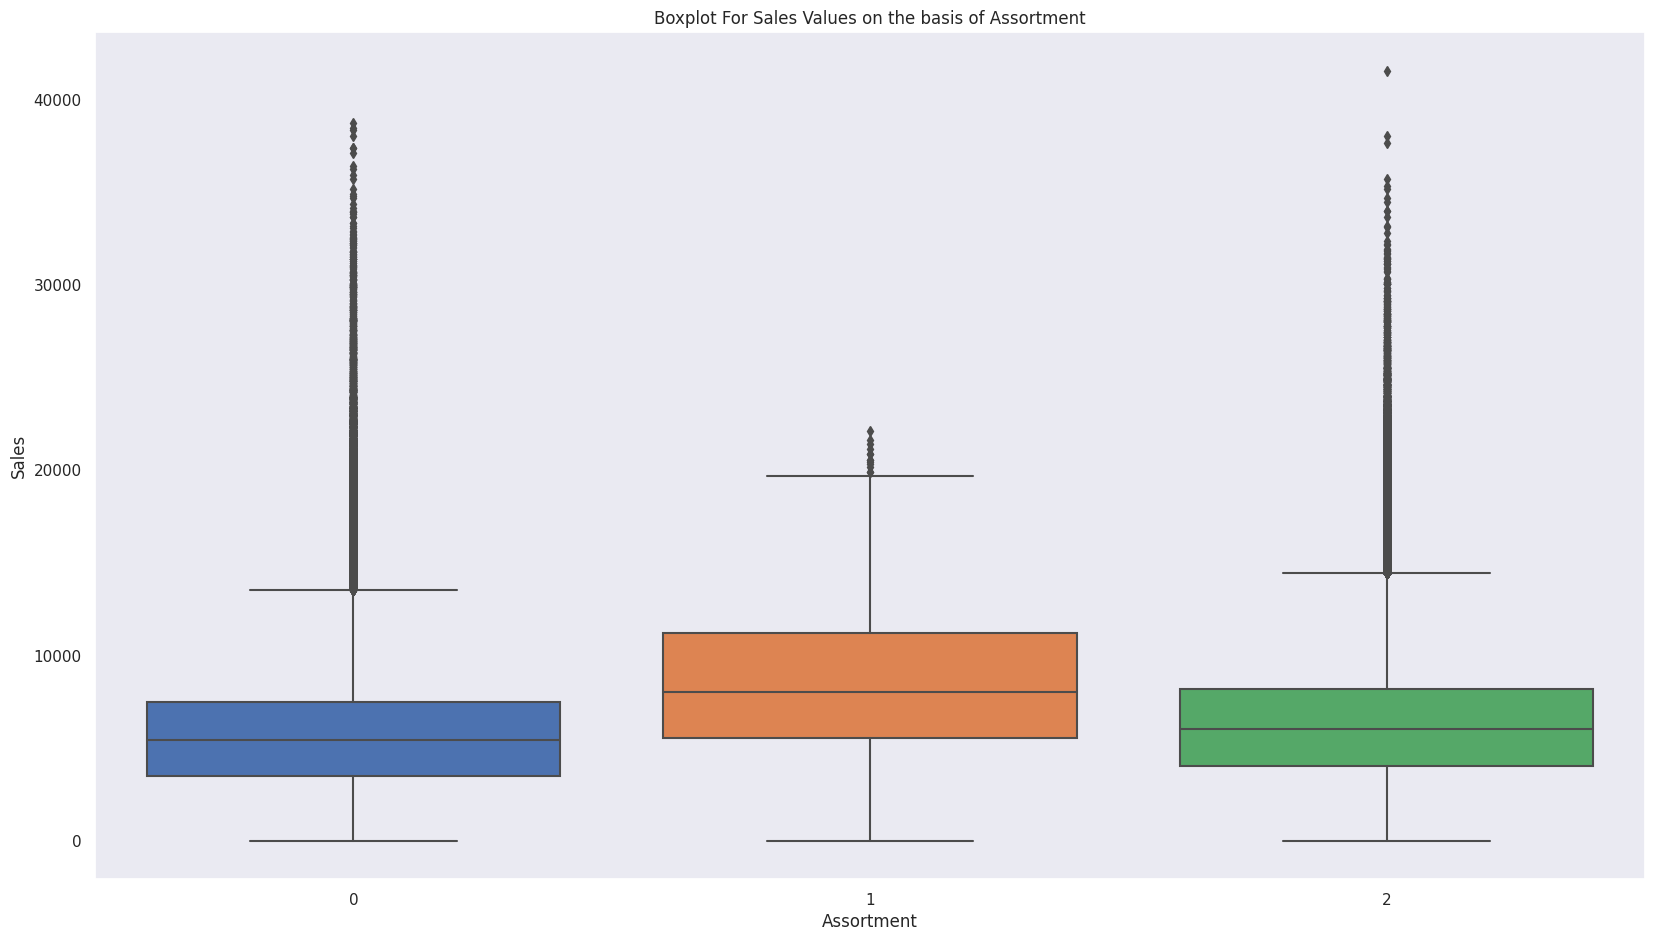

In [135]:
plt.figure(figsize=(20, 11))
plot_storetype_sales = sns.boxplot(x="Assortment", y="Sales", data=store, saturation=1.5,width=0.8)
plt.title('Boxplot For Sales Values on the basis of Assortment')

#### Chart - 2

In [ ]:
store.head()

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,SchoolHoliday,Year,Month,Day,Weekof year,StoreType,Assortment,CompetitionDistance,Promo2
0,1,5,2015-07-31,5263,555,1,1,1,2015,7,31,31,c,a,1270.0,0
1,2,5,2015-07-31,6064,625,1,1,1,2015,7,31,31,a,a,570.0,1
2,3,5,2015-07-31,8314,821,1,1,1,2015,7,31,31,a,a,14130.0,1
3,4,5,2015-07-31,13995,1498,1,1,1,2015,7,31,31,c,c,620.0,0
4,5,5,2015-07-31,4822,559,1,1,1,2015,7,31,31,a,a,29910.0,0


In [136]:
# Chart - 2 visualization code
store["Avg_Customer_Sales"] = store.Sales/store.Customers

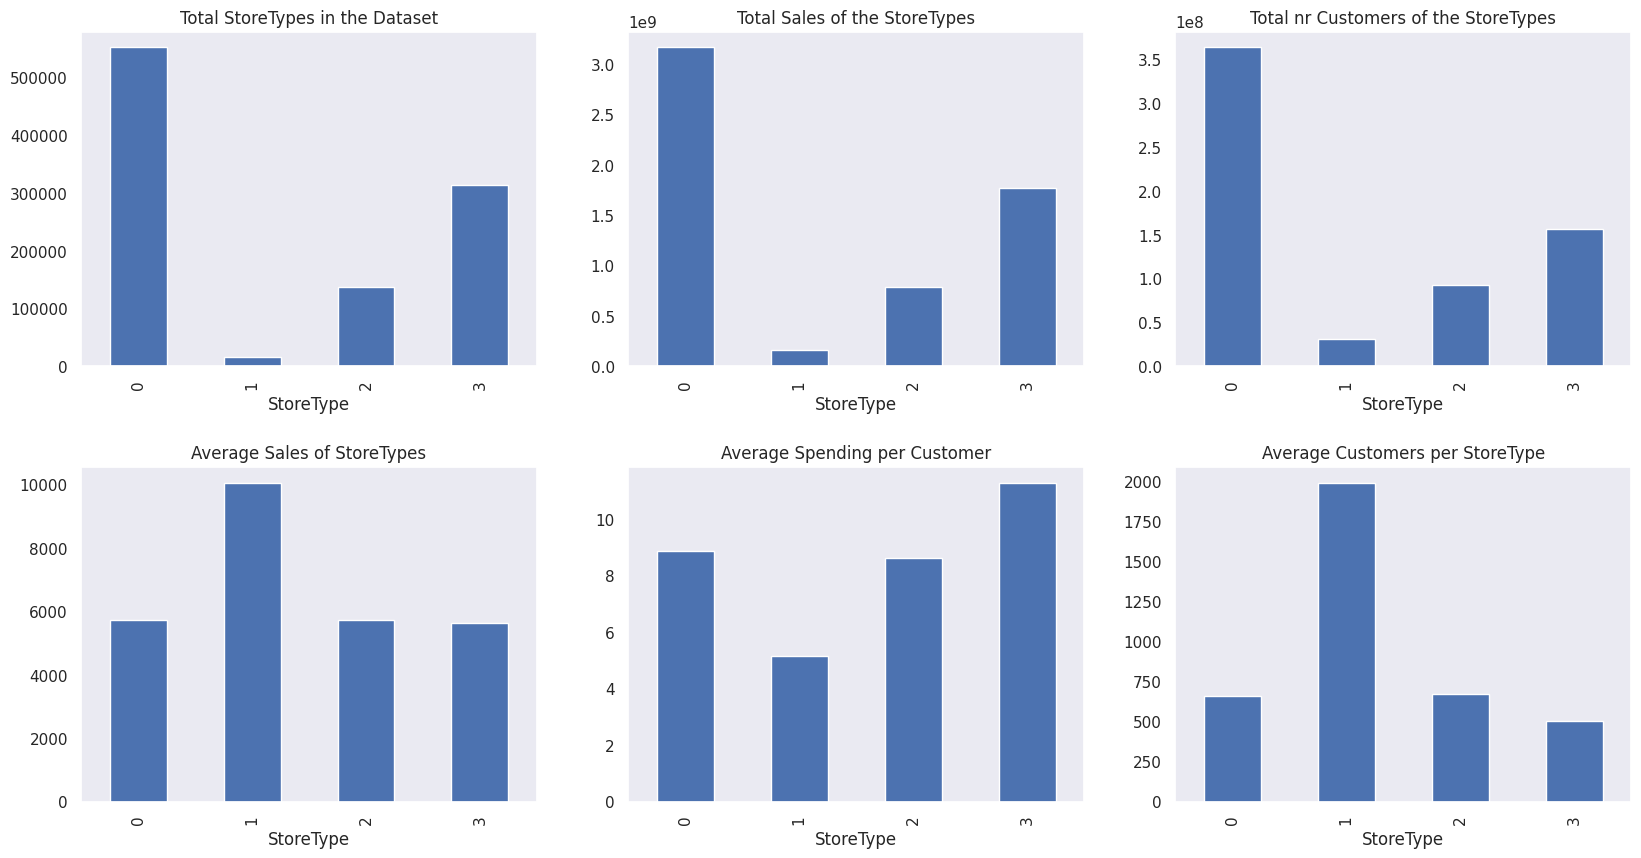

In [137]:
f, ax = plt.subplots(2, 3, figsize = (20,10))

store.groupby("StoreType")["Store"].count().plot(kind = "bar", ax = ax[0, 0], title = "Total StoreTypes in the Dataset")
store.groupby("StoreType")["Sales"].sum().plot(kind = "bar", ax = ax[0,1], title = "Total Sales of the StoreTypes")
store.groupby("StoreType")["Customers"].sum().plot(kind = "bar", ax = ax[0,2], title = "Total nr Customers of the StoreTypes")
store.groupby("StoreType")["Sales"].mean().plot(kind = "bar", ax = ax[1,0], title = "Average Sales of StoreTypes")
store.groupby("StoreType")["Avg_Customer_Sales"].mean().plot(kind = "bar", ax = ax[1,1], title = "Average Spending per Customer")
store.groupby("StoreType")["Customers"].mean().plot(kind = "bar", ax = ax[1,2], title = "Average Customers per StoreType")

plt.subplots_adjust(hspace = 0.3)
plt.show()

#### Chart - 3

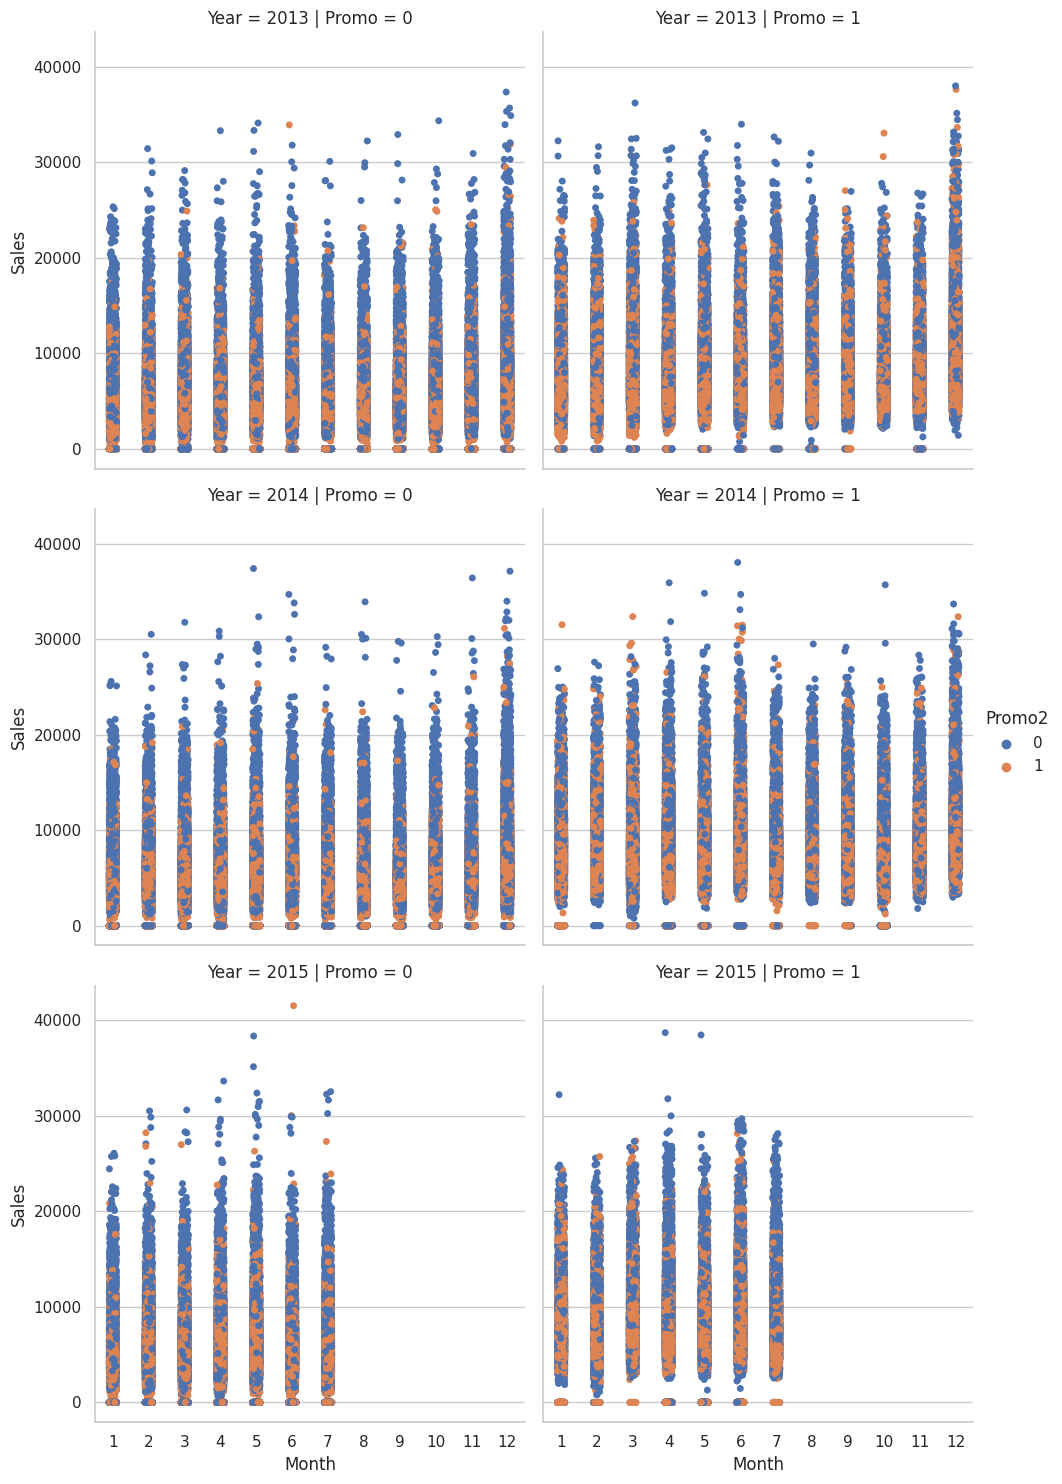

In [ ]:
# Chart - 3 visualization code
sns.catplot(data = store, x ="Month", y = "Sales", col = 'Promo', hue = 'Promo2',row = "Year" )
# So, of course, if the stores are having promotion the sells are higher.
# Overall the store promotions sellings are also higher than the seasionality promotions (Promo2). However I can't see no yearly trend. 


#### Chart - 4

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)


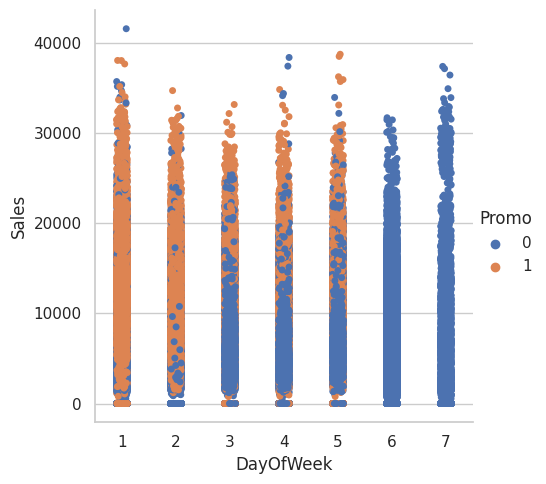

In [ ]:
# Chart - 4 visualization code
sns.catplot(data = store, x = "DayOfWeek", y = "Sales", hue = "Promo")

#### Chart - 5

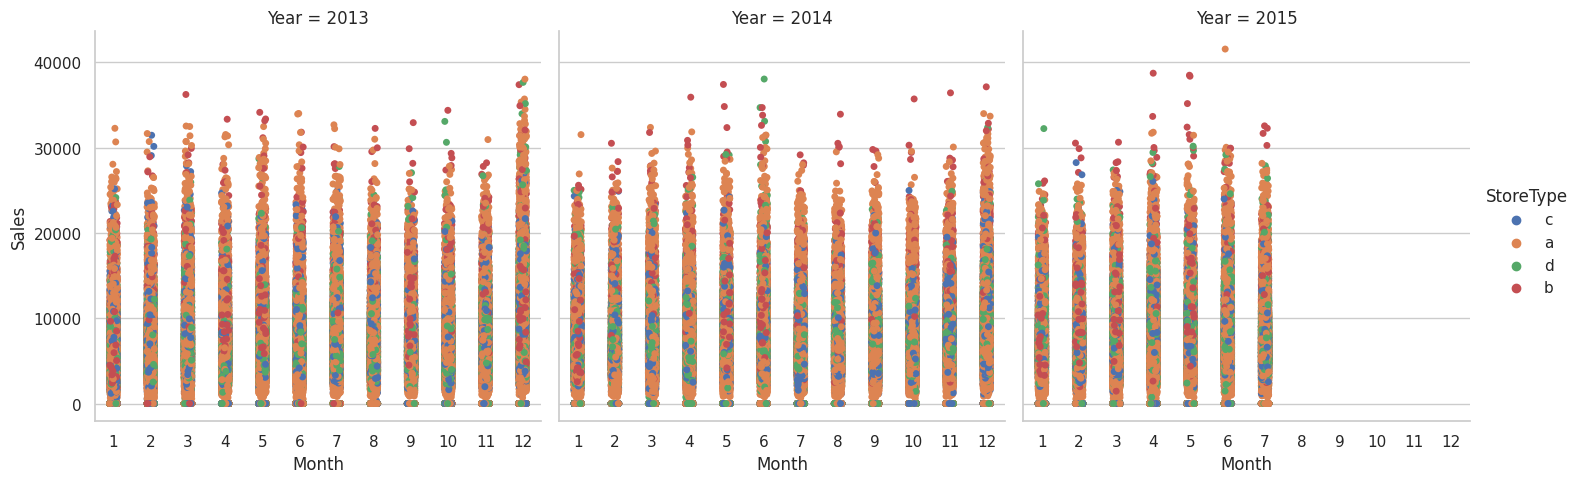

In [ ]:
# Chart - 5 visualization code
sns.catplot(data = store, x = "Month", y = "Sales", col = "Year", hue = "StoreType")
# Yes, we can see a seasonalities, but not trends. The sales stays constantly yearly. 

#### Chart - 6

In [138]:
# Chart - 6 visualization code
#What about the Competition Distance. What kind of inpact does this have on the sales.
store.CompetitionDistance.describe()
# The obsverations are continous numbers, so we need to convert them into a categories. Lets a create a new variable.
store["CompetitionDistance_Cat"] = pd.cut(store["CompetitionDistance"], 5)

#### Chart - 7

<Axes: title={'center': 'Average Total Customers by Competition Distance'}, xlabel='CompetitionDistance_Cat'>

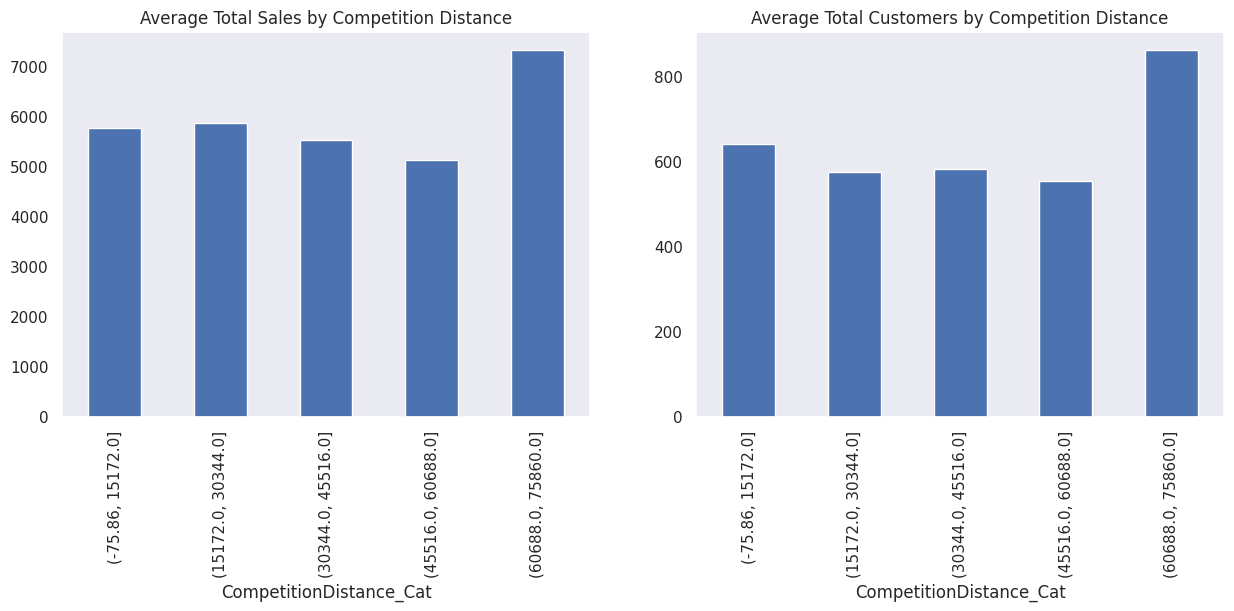

In [139]:
# Chart - 7 visualization code
f, ax = plt.subplots(1,2, figsize = (15,5))

store.groupby(by = "CompetitionDistance_Cat").Sales.mean().plot(kind = "bar", title = "Average Total Sales by Competition Distance", ax = ax[0])
store.groupby(by = "CompetitionDistance_Cat").Customers.mean().plot(kind = "bar", title = "Average Total Customers by Competition Distance", ax = ax[1])

# It is pretty clear. If the competions is very far away, the stores are performing better (sales and customers)

In [140]:
store.drop(['Avg_Customer_Sales','CompetitionDistance_Cat'],axis=1,inplace=True)

->Box plot shows that we have a very high outliers in sales

<Axes: >

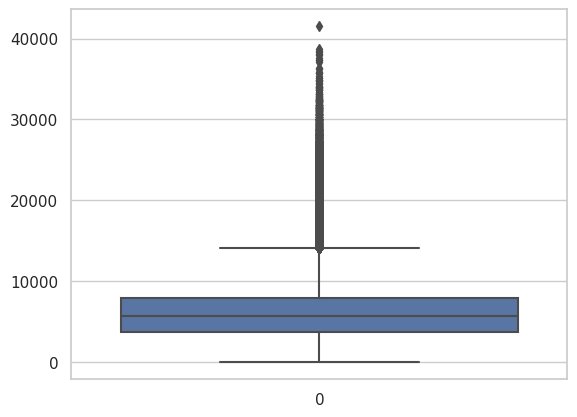

In [ ]:
#checking outliers in sales
sns.boxplot(store_train['Sales'])

->Removing Outliers Of Sales Column

In [141]:
#removing outliers
def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

In [142]:
# defining new variable after removing outliers
store= remove_outlier(store, 'Sales')

####Drop Subsets Of Data Where Might Cause Bias

In [143]:
# where stores are closed, they won't generate sales, so we will remove that part of the dataset
store = store[store.Open != 0]

In [144]:
# Open isn't a variable anymore, so we'll drop it too
store = store.drop('Open', axis=1)

In [145]:
# Check if there's any opened store with zero sales
store[store.Sales == 0]['Store'].sum()

31460

In [146]:
# see the percentage of open stored with zero sales
store[store.Sales == 0]['Sales'].sum()/store.Sales.sum()

0.0

In [147]:
# remove this part of data to avoid bias
store = store[store.Sales != 0]

In [148]:
store_new=store.copy()

In [ ]:
# store_new = pd.get_dummies(store_new,columns=['StoreType','Assortment'])

In [149]:
store_new.head()

,Store,DayOfWeek,Date,Sales,Customers,Promo,StateHoliday,SchoolHoliday,Year,Month,Day,Weekof year,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear
0,1,5,2015-07-31,5263,555,1,0,1,2015,7,31,31,2,0,1270,9,2008,0,0,0
1,2,5,2015-07-31,6064,625,1,0,1,2015,7,31,31,0,0,570,11,2007,1,13,2010
2,3,5,2015-07-31,8314,821,1,0,1,2015,7,31,31,0,0,14130,12,2006,1,14,2011
3,4,5,2015-07-31,13995,1498,1,0,1,2015,7,31,31,2,2,620,9,2009,0,0,0
4,5,5,2015-07-31,4822,559,1,0,1,2015,7,31,31,0,0,29910,4,2015,0,0,0


#### Chart - 8

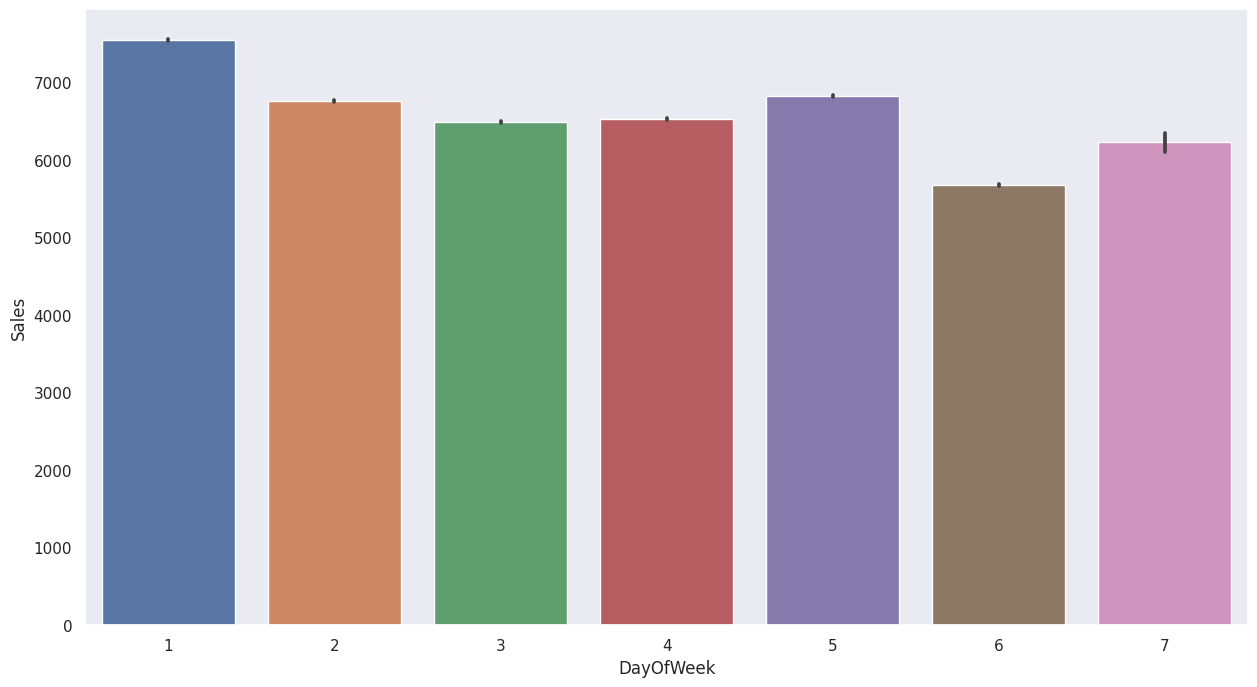

In [150]:
# Chart - 8 visualization code
#plot for sales in terms of days ofthe week
plt.figure(figsize=(15,8))
sns.barplot(x='DayOfWeek', y='Sales' ,data=store_new); 

#Setting Features and Target Variables

In [ ]:
# defining dependent variable
# dependent_variables = 'Sales'

In [ ]:
# defining independent variable
# independent_variables = list(new_df.columns.drop(['Promo2SinceYear','Date','Sales']))

In [ ]:
X = store_new.drop(['Sales','Store','Date','Year'] , axis = 1)
y= store_new.Sales

In [ ]:
X.shape

(817644, 16)

In [ ]:
X.head()

,DayOfWeek,Customers,Promo,SchoolHoliday,Month,Day,Weekof year,CompetitionDistance,Promo2,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
0,5,555,1,1,7,31,31,1270.0,0,0,0,1,0,1,0,0
1,5,625,1,1,7,31,31,570.0,1,1,0,0,0,1,0,0
2,5,821,1,1,7,31,31,14130.0,1,1,0,0,0,1,0,0
3,5,1498,1,1,7,31,31,620.0,0,0,0,1,0,0,0,1
4,5,559,1,1,7,31,31,29910.0,0,1,0,0,0,1,0,0


In [ ]:
y.head()

0     5263
1     6064
2     8314
3    13995
4     4822
Name: Sales, dtype: int64

####Splitting Dataset Into Training Set and Test Set

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [ ]:
columns=X_train.columns

In [ ]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 572350 entries, 970857 to 380506
Data columns (total 16 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   DayOfWeek            572350 non-null  int64  
 1   Customers            572350 non-null  int64  
 2   Promo                572350 non-null  int64  
 3   SchoolHoliday        572350 non-null  int64  
 4   Month                572350 non-null  int64  
 5   Day                  572350 non-null  int64  
 6   Weekof year          572350 non-null  int64  
 7   CompetitionDistance  572350 non-null  float64
 8   Promo2               572350 non-null  int64  
 9   StoreType_a          572350 non-null  uint8  
 10  StoreType_b          572350 non-null  uint8  
 11  StoreType_c          572350 non-null  uint8  
 12  StoreType_d          572350 non-null  uint8  
 13  Assortment_a         572350 non-null  uint8  
 14  Assortment_b         572350 non-null  uint8  
 15  Assortment_c

####Implementing Supervised Machine Learning algorithms.

1. Linear Regression (OLS)

In [ ]:
# Transforming data
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Fitting Multiple Linear Regression to the Training set
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
regressor.intercept_

-1507.441798569973

In [ ]:
regressor.coef_

array([-1.30381346e+02,  3.06863041e+04,  1.09386001e+03,  2.29418388e+01,
        3.54223020e+02,  3.82831239e+01, -1.58021936e+02,  1.82430640e+03,
        3.10732033e+02,  3.18132398e+02, -1.90167603e+03,  1.67419398e+02,
        1.41612423e+03,  1.44688318e+03, -3.17950648e+03,  1.73262330e+03])

In [ ]:
y_pred_train = regressor.predict(X_train)

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
mean_squared_error(y_test, y_pred)

1329406.2402058854

In [ ]:
# Test performance
math.sqrt(mean_squared_error(y_test, y_pred))

1152.998803210951

In [ ]:
train_score_1=regressor.score(X_train,y_train)
train_score_1

0.7807496727472854

In [ ]:
test_score_1=regressor.score(X_test,y_test)
test_score_1

0.7823919595957616

In [ ]:
#storing 100 observations for analysis
simple_lr_pred = y_pred[:100]
simple_lr_real = y_test[:100]
dataset_lr = pd.DataFrame({'Real':simple_lr_real,'PredictedLR':simple_lr_pred}) #storing these values into dataframe

In [ ]:
#storing absolute diffrences between actual sales price and predicted
dataset_lr['diff']=(dataset_lr['Real']-dataset_lr['PredictedLR']).abs()

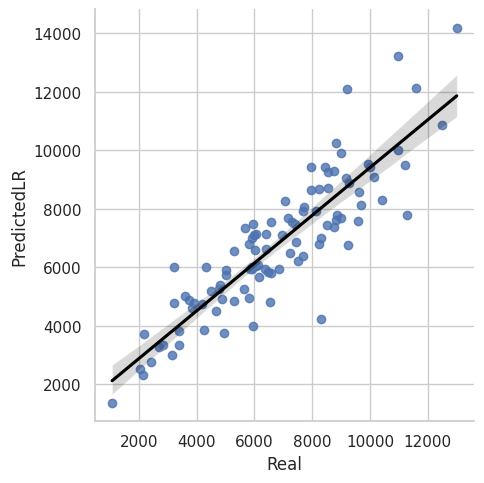

In [ ]:
#visualising our predictions
sns.lmplot(x='Real', y='PredictedLR', data=dataset_lr, line_kws={'color': 'black'});

####Inferences On Linear Regression Coefficients

In [ ]:
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.781
Model:                            OLS   Adj. R-squared:                  0.781
Method:                 Least Squares   F-statistic:                 2.086e+05
Date:                Mon, 17 Apr 2023   Prob (F-statistic):               0.00
Time:                        16:10:35   Log-Likelihood:            -6.9257e+06
No. Observations:              817644   AIC:                         1.385e+07
Df Residuals:                  817629   BIC:                         1.385e+07
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                -993.1075      5.669   -175.169      0.000   -1004.219    -981.996
DayOfWeek             -21.0704      0.785    -26.837      0.000     -22.609     -19.532
Customers               7.2260      0.005   1471.966      0.000       7.216       7.236
Promo                1093.4894      2.768    395.028      0.000    1088.064    1098.915
SchoolHoliday          27.2192      3.326      8.183      0.000      20.700      33.738
Month                  33.1415      1.433     23.134      0.000      30.334      35.949
Day                     1.2777      0.152      8.418      0.000       0.980       1.575
Weekof year            -3.3867      0.330    -10.267      0.000      -4.033      -2.740
CompetitionDistance     0.0240      0.000    140.522      0.000       0.024       0.024
Promo2                307.7765      2.662    115.635      0.000     302.560     312.993
StoreType_a            66.5792      4.780     13.929      0.000      57.211      75.948
StoreType_b         -2140.7862     12.728   -168.195      0.000   -2165.733   -2115.840
StoreType_c           -81.9285      5.313    -15.419      0.000     -92.342     -71.514
StoreType_d          1163.0279      5.024    231.517      0.000    1153.182    1172.874
Assortment_a         1114.6637      6.456    172.654      0.000    1102.010    1127.317
Assortment_b        -3510.5496     15.385   -228.183      0.000   -3540.703   -3480.396
Assortment_c         1402.7783      6.642    211.194      0.000    1389.760    1415.797
==============================================================================
Omnibus:                    49108.747   Durbin-Watson:                   1.716
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           145480.294
Skew:                           0.301   Prob(JB):                         0.00
Kurtosis:                       4.977   Cond. No.                     8.34e+19
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.08e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Warnings:

[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.

[2] The smallest eigenvalue is 1.15e-26. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.

2. LARS Lasso Regression

In [ ]:
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(X_train, y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_base.py:109: FutureWarning: 'normalize' was deprecated in version 1.2 and will be removed in 1.4.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LassoLars())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)

Set parameter alpha to: original_alpha * np.sqrt(n_samples). 
  warnings.warn(


In [ ]:
def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100

train_score_2=lasreg.score(X_train, y_train)
test_score_2=lasreg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_2 , "," ,
      "Out of Sample Test Score" ,":" , test_score_2)

y_predicted = lasreg.predict(X_train)
y_test_predicted = lasreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.7807308911324253 , Out of Sample Test Score : 0.7823685232825739
Training RMSE : 1155.0769465274698 Testing RMSE : 1153.0608903320883
Training MAPE : 14.215633319957128 Testing MAPE : 14.233294529232587


3. Decision Tree Regression

In [ ]:
tree = DecisionTreeRegressor()
treereg = tree.fit(X_train, y_train)



In [ ]:
train_score_3=treereg.score(X_train, y_train)
test_score_3=treereg.score(X_test, y_test)

print("Regresion Model Score" , ":" , train_score_3 , "," ,
      "Test Score" ,":" , test_score_3)

y_predicted = treereg.predict(X_train)
y_test_predicted = treereg.predict(X_test)
print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.9999957301266714 , Test Score : 0.9159057296353073
Training RMSE : 5.097176662035323 Testing RMSE : 716.7613699623587
Training MAPE : 0.0010365300881590655 Testing MAPE : 7.638137442781495


5. K-Nearest Neighbors Regression

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 30)
knnreg = knn.fit(X_train, y_train)

In [ ]:
print("Regresion Model Score" , ":" , knnreg.score(X_train, y_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(X_test, y_test))

y_predicted = knnreg.predict(X_train)
y_test_predicted = knnreg.predict(X_test)

print("Training RMSE", ":", rmse(y_train, y_predicted),
      "Testing RMSE", ":", rmse(y_test, y_test_predicted))
print("Training MAPE", ":", mape(y_train, y_predicted),
      "Testing MAPE", ":", mape(y_test, y_test_predicted))

Regresion Model Score : 0.7372261980067728 , Out of Sample Test Score : 0.7166584142323265
Training RMSE : 1264.4836631252208 Testing RMSE : 1315.6687141978773
Training MAPE : 16.244493588517088 Testing MAPE : 16.928417525093515


Feature Importance On Random Forest Regressor

As we can see that Random Forest has the highest test score

In [ ]:
def plot_feature_importance(importance,names,model_type):

  #Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + ' FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

In [ ]:
plot_feature_importance(rdfreg.feature_importances_,columns[:],'RANDOM FOREST')

NameError: ignored

Customers, CompetitionDistance, StoreType_d, Promo these four are most important features in our sales prediction.

In [ ]:
score_df = pd.DataFrame({'Train_Score':[train_score_1,train_score_2,train_score_3,train_score_4,train_score_5],'Test_Score':[test_score_1,test_score_2,test_score_3,test_score_4,test_score_5]},index=['Linear Regression','Lasso Regression','Decision Tree',"Decision Tree(hyperparameters)",'Random Forest Regression'])


Conclusion

In [ ]:
score_df

Random Forest regressor achieved lowest MAPE as 5.65% showing that it is a highly accurate model. MAE is the average magnitude of error produced by your model, the MAPE is how far the model’s predictions are off from their corresponding outputs on average

In [ ]:
# x=store_train
# y=store_test

In [ ]:
#  from sklearn.model_selection import train_test_split  X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)

## **5. Solution to Business Objective**

#### What do you suggest the client to achieve Business Objective ? 
Explain Briefly.

Answer Here.

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your EDA Capstone Project !!!***